# Project 1: SAT & ACT Analysis

## Problem Statement

Bringing the SAT back to relevance through the use of visualizing techniques to analyze the SAT / ACT data and subsequently make recommendations to the College Board with our findings. 

## Executive Summary

The SAT was once the most widely used college admission exam in the US. Designed as an aptitude test to measure intelligence, it was held as a standard on how well a high school student will succeed in college. Since the 2000s and up to 2012, the SAT was losing sight of its relevance at the same time, the ACT, was gaining ground. In 2012, the nationwide participation rates for ACT overtook the SAT for the first time. The College Board sought to implement major design changes to the SAT which was subsequently launched in 2016. With a full year after implementation, we analyze the results and success using the SAT and ACT participation and scoring data by states in 2017 and 2018, and make further recommendations from any insights gained to improve take-up rate.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Sources](#Sources)
- [Addendum](#Addendum)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py 
import plotly.express as px
import plotly.graph_objs as go  # plotly for plotting choropleth maps
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('seaborn') # set plt style

## 2017 Data Import and Cleaning

####  Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#read respective csv data for 2017 SAT and ACT 
df_sat_2017 = pd.read_csv("./data/sat_2017.csv")
df_act_2017 = pd.read_csv("./data/act_2017.csv")

#### Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#look at first 10 rows of sat_2017
df_sat_2017.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [4]:
# Some exploring of df_sat_2017 part 1:
print(df_sat_2017.shape) # 51 rows and 5 columns
print("")
print(df_sat_2017.info()) 

(51, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


**Comment:** All entries are filled (i.e, non-null). Noted that Participation is a str and non-str columns (Evidence-Based Reading and Writing, Math, Total) are integers


In [5]:
# Some exploring of df_sat_2017 part 2:
df_sat_2017.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000

**Comment:** Noted the potential error for min Math (52.0) since SAT min score is 200 for each section

In [6]:
#look at first 10 rows of act_2017
df_act_2017.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

In [7]:
# Some exploring of df_act_2017 part.1:
print(df_act_2017.shape) # 52 rows and 7 columns. Noted the additional 'National' row compared to df_sat_2017
print("")
print(df_act_2017.info())

(52, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None


**Comment:** All entries are filled. Participation and Composite are str values which needs to be checked. Non-str columns (English, Math, Reading, Science) are floats.

In [8]:
# Some exploring of df_act_2017 part 2:
df_act_2017.describe() 

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000

**Comment:** We also note here the potential error in min Science which shows low value of 2.3

#### Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

**sat_2017 data:**
We have 51 rows by 5 columns including a header row with 'State' (input as str), 'Participation'(str), 'Evidence-Based Reading and Writing'(int), 'Math'(int) and 'Total'(int) as headers. There are no empty cells in sat_2017 data set. Excluding the headers, we have 51 x 5 = 255 entries, with each row showing the 2017 SAT data for the particular US state. Participation's dtype is a string hence this needs to be investigated. We note the potential error for min Math (52.0)


<br>**act_2017 data:**
We have 52 rows by 7 columns including a header row with 'State'(input as str), 'Participation'(str), 'English'(float), 'Math'(float), 'Reading'(float), 'Science'(float), and 'Composite'(float) as headers. There are also no empty cells in act_2017 data set. Excluding the headers, we have 52 x 7 = 364 entries, with each row showing the 2017 ACT data for the particular US state. The difference in the rows between sat_2017 and act_2017 is the presence of 'National' in act_2017, showing the overall national data. Likewise, Participation's dtype is a string and needs to be investigated. Also Composite's dtype is also a string which we will take a closer look as well. We also note the potential error in min Science which shows a low value of 2.3.


#### Does the data look complete? 

**Answer:**

Yes. From .info() for each dataframe, we see that there are no non-null values. Hence the data is complete in the sense that there are no empty cells. However, there might be possible errors in selective cells which we will discuss below.

#### Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**SAT**

For the SAT, each section is scored at a min of 200 and maximum of 800, for a total with min of 400 and max of 1,600, which is the summation of the 2 sections: Maths and Evidence based reading. We have a value of Math = 52 which is less than the min limit in the SAT. We will check this against the source data further on.

**ACT**

For the ACT, each section score is scaled to a min of 1 to max 36 and the composite is the average of the scores of each section and hence also have a min of 1 and max of 36. We notice a Science value of 2.3 which looks suspiciously low and will check this against the source as well.

In [9]:
# for df_sat_017
# compare df_sat_2017 with the sat 2017 scores provided by the link
df_sat_2017

State Participation  Evidence-Based Reading and Writing  \
0                Alabama            5%                                 593   
1                 Alaska           38%                                 547   
2                Arizona           30%                                 563   
3               Arkansas            3%                                 614   
4             California           53%                                 531   
5               Colorado           11%                                 606   
6            Connecticut          100%                                 530   
7               Delaware          100%                                 503   
8   District of Columbia          100%                                 482   
9                Florida           83%                                 520   
10               Georgia           61%                                 535   
11                Hawaii           55%                                 544   
12                 Idaho           93%                                 513   
13              Illinois            9%                                 559   
14               Indiana           63%                                 542   
15                  Iowa            2%                                 641   
16                Kansas            4%                                 632   
17              Kentucky            4%                                 631   
18             Louisiana            4%                                 611   
19                 Maine           95%                                 513   
20              Maryland           69%                                 536   
21         Massachusetts           76%                                 555   
22              Michigan          100%                                 509   
23             Minnesota            3%                                 644   
24           Mississippi            2%                                 634   
25              Missouri            3%                                 640   
26               Montana           10%                                 605   
27              Nebraska            3%                                 629   
28                Nevada           26%                                 563   
29         New Hampshire           96%                                 532   
30            New Jersey           70%                                 530   
31            New Mexico           11%                                 577   
32              New York           67%                                 528   
33        North Carolina           49%                                 546   
34          North Dakota            2%                                 635   
35                  Ohio           12%                                 578   
36              Oklahoma            7%                                 530   
37                Oregon           43%                                 560   
38          Pennsylvania           65%                                 540   
39          Rhode Island           71%                                 539   
40        South Carolina           50%                                 543   
41          South Dakota            3%                                 612   
42             Tennessee            5%                                 623   
43                 Texas           62%                                 513   
44                  Utah            3%                                 624   
45               Vermont           60%                                 562   
46              Virginia           65%                                 561   
47            Washington           64%                                 541   
48         West Virginia           14%                                 558   
49             Wisconsin            3%                                 642   
50               Wyoming            3%   

In [10]:
# we see that Maryland Math should be 524 instead of 52, rest of the entries in df_sat_2017 matches the link
df_sat_2017.loc[df_sat_2017['State'] == 'Maryland']

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060

In [11]:
# for df_act_2017
# compare df_act_2017 with the ACT 2017 scores provided in slack
df_act_2017

State Participation  English  Math  Reading  Science  \
0               National           60%     20.3  20.7     21.4     21.0   
1                Alabama          100%     18.9  18.4     19.7     19.4   
2                 Alaska           65%     18.7  19.8     20.4     19.9   
3                Arizona           62%     18.6  19.8     20.1     19.8   
4               Arkansas          100%     18.9  19.0     19.7     19.5   
5             California           31%     22.5  22.7     23.1     22.2   
6               Colorado          100%     20.1  20.3     21.2     20.9   
7            Connecticut           31%     25.5  24.6     25.6     24.6   
8               Delaware           18%     24.1  23.4     24.8     23.6   
9   District of Columbia           32%     24.4  23.5     24.9     23.5   
10               Florida           73%     19.0  19.4     21.0     19.4   
11               Georgia           55%     21.0  20.9     22.0     21.3   
12                Hawaii           90%     17.8  19.2     19.2     19.3   
13                 Idaho           38%     21.9  21.8     23.0     22.1   
14              Illinois           93%     21.0  21.2     21.6     21.3   
15               Indiana           35%     22.0  22.4     23.2     22.3   
16                  Iowa           67%     21.2  21.3     22.6     22.1   
17                Kansas           73%     21.1  21.3     22.3     21.7   
18              Kentucky          100%     19.6  19.4     20.5     20.1   
19             Louisiana          100%     19.4  18.8     19.8     19.6   
20                 Maine            8%     24.2  24.0     24.8     23.7   
21              Maryland           28%     23.3  23.1     24.2      2.3   
22         Massachusetts           29%     25.4  25.3     25.9     24.7   
23              Michigan           29%     24.1  23.7     24.5     23.8   
24             Minnesota          100%     20.4  21.5     21.8     21.6   
25           Mississippi          100%     18.2  18.1     18.8     18.8   
26              Missouri          100%     19.8  19.9     20.8     20.5   
27               Montana          100%     19.0  20.2     21.0     20.5   
28              Nebraska           84%     20.9  20.9     21.9     21.5   
29                Nevada          100%     16.3  18.0     18.1     18.2   
30         New Hampshire           18%     25.4  25.1     26.0     24.9   
31            New Jersey           34%     23.8  23.8     24.1     23.2   
32            New Mexico           66%     18.6  19.4     20.4     20.0   
33              New York           31%     23.8  24.0     24.6     23.9   
34        North Carolina          100%     17.8  19.3     19.6     19.3   
35          North Dakota           98%     19.0  20.4     20.5     20.6   
36                  Ohio           75%     21.2  21.6     22.5     22.0   
37              Oklahoma          100%     18.5  18.8     20.1     19.6   
38                Oregon           40%     21.2  21.5     22.4     21.7   
39          Pennsylvania           23%     23.4  23.4     24.2     23.3   
40          Rhode Island           21%     24.0  23.3     24.7     23.4   
41        South Carolina          100%     17.5  18.6     19.1     18.9   
42          South Dakota           80%     20.7  21.5     22.3     22.0   
43             Tennessee          100%     19.5  19.2     20.1     19.9   
44                 Texas           45%     19.5  20.7     21.1     20.9   
45                  Utah          100%     19.5  19.9     20.8     20.6   
46               Vermont           29%     23.3  23.1     24.4     23.2   
47              Virginia           29%     23.5  23.3     24.6     23.5   
48            Washington           29%     20.9  21.9     22.1     22.0   
49         West Virginia           69%     20.0  19.4     21.2     20.5   
50             Wisconsin          100%     19.7  20.4     20.6     20.9   
51               Wyoming          100%     19.4  19.8     20.8     20.6   

   Composite  
0       21.0  
1       19.2 

In [12]:
# we see that Maryland (again!) Science should be 23.2 instead of 2.3, 
# the rest of the entries in df_act_2017 matches the link
df_act_2017.loc[df_act_2017['State'] == 'Maryland']

State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6

In [13]:
# Additionally, the entry for Wyoming, Composite is suspect, it should be 20.2 instead of 20.2x
df_act_2017.loc[df_act_2017['State'] == 'Wyoming']

State Participation  English  Math  Reading  Science Composite
51  Wyoming          100%     19.4  19.8     20.8     20.6     20.2x

**Answer:**

We identified 3 errors:
1. df_sat_2017: Maryland, Math should be 524 instead of 52
2. df_act_2017: Maryland, Science should be 23.2 instead of 2.3
3. df_act_2017: Wyoming, Composite should be 20.2 instead of 20.2x

#### Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [14]:
# for fixing df_sat_2017: Maryland, Math from 52 to 524
df_sat_2017.at[20, 'Math'] # check

52

In [15]:
df_sat_2017.at[20, 'Math'] = 524

In [16]:
# check if value is updated
df_sat_2017.loc[df_sat_2017['State'] == 'Maryland']

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536   524   1060

In [17]:
# for fixing df_act_2017: Maryland, Science from 2.3 to 23.2
df_act_2017.at[21, 'Science'] # check

2.3

In [18]:
df_act_2017.at[21, 'Science'] = 23.2

In [19]:
df_act_2017.loc[df_act_2017['State'] == 'Maryland']

State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2     23.2      23.6

In [20]:
# for fixing df_act_2017: Wyoming, Composite from 20.2x to 20.2
df_act_2017.at[51, 'Composite'] # check

'20.2x'

In [21]:
df_act_2017.at[51, 'Composite'] = 20.2

In [22]:
df_act_2017.loc[df_act_2017['State'] == 'Wyoming'] 

State Participation  English  Math  Reading  Science Composite
51  Wyoming          100%     19.4  19.8     20.8     20.6      20.2

#### What are your data types? 
Display the data types of each feature. 

In [23]:
# for df_sat_2017
df_sat_2017.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [24]:
# for df_act_2017
df_act_2017.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

**SAT**

For the SAT, participation should be either int or float instead of str
    


**ACT**

Similarly, Participation and Composite should be either int or float 

#### Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [25]:
def convert_percent(val):
    val = val.replace('%', '')
    val = float(val)
    return val

In [26]:
# for df_sat_2017
df_sat_2017['Participation'] = df_sat_2017['Participation'].map(convert_percent)

In [27]:
# check
print(df_sat_2017['Participation'].head())
print("")
print(df_sat_2017.info()) # participation is now a float

0     5.0
1    38.0
2    30.0
3     3.0
4    53.0
Name: Participation, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


In [28]:
# for df_act_2017
df_act_2017['Participation'] = df_act_2017['Participation'].map(convert_percent)

In [29]:
# check
print(df_act_2017['Participation'].head())
print("")
print(df_act_2017.info()) # participation is now a float

0     60.0
1    100.0
2     65.0
3     62.0
4    100.0
Name: Participation, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.0+ KB
None


- Fix any individual values preventing other columns from being the appropriate type.

In [30]:
# we want to change Composite column in df_act_2017 from str to float
# first, create a function:
def convert_float(val):
    return float(val)

In [31]:
# apply to df_act_2017 Composite column
df_act_2017['Composite'] = df_act_2017['Composite'].map(convert_float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [32]:
# check
print(df_act_2017['Composite'].head()) # Composite is now a float
print('')
print(df_act_2017.info()) 

0    21.0
1    19.2
2    19.8
3    19.7
4    19.4
Name: Composite, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB
None


- Display the data types again to confirm they are correct.

In [33]:
# final overall check for df_sat_2017
print(df_sat_2017.info()) # no non-null values, data types are what we want
print('')
print(df_sat_2017.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None

        State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5.0                                 593   572   1165
1      Alaska           38.0                                 547   533   1080
2     Arizona           30.0                                 563   553   1116
3    Arkansas            3.0                                 61

In [34]:
# final overall check for df_act_2017
print(df_act_2017.info()) # no non-null values, data types are what we want
print('')
print(df_act_2017.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB
None

      State  Participation  English  Math  Reading  Science  Composite
0  National           60.0     20.3  20.7     21.4     21.0       21.0
1   Alabama          100.0     18.9  18.4     19.7     19.4       19.2
2    Alaska           65.0     18.7  19.8     20.4     19.9       19.8
3   Arizona           62.0     18.6  19.8     20.1     19.8       19.7
4  Arkansas          100.0     18.9  19.0     19.7     19.5       19.4


#### Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [35]:
# specify dict with key: old name and value: new name for the column names
sat_2017_column_names = {'State': 'state',
                         'Participation': 'sat_2017_part',
                         'Evidence-Based Reading and Writing': 'sat_2017_read_wri',
                         'Math': 'sat_2017_math',
                         'Total': 'sat_2017_tot',
                        }

act_2017_column_names = {'State': 'state',
                         'Participation': 'act_2017_part',
                         'English': 'act_2017_eng',
                         'Math': 'act_2017_math',
                         'Reading': 'act_2017_read',
                         'Science': 'act_2017_sci',
                         'Composite': 'act_2017_comp',
                        }

In [36]:
# changing column names for df_sat_2017
df_sat_2017.rename(columns=sat_2017_column_names, inplace=True)

In [37]:
# check new column names for df_sat_2017
df_sat_2017.columns

Index(['state', 'sat_2017_part', 'sat_2017_read_wri', 'sat_2017_math',
       'sat_2017_tot'],
      dtype='object')

In [38]:
# changing column names for df_act_2017
df_act_2017.rename(columns=act_2017_column_names, inplace=True)

In [39]:
# check new column names for df_act_2017
df_act_2017.columns

Index(['state', 'act_2017_part', 'act_2017_eng', 'act_2017_math',
       'act_2017_read', 'act_2017_sci', 'act_2017_comp'],
      dtype='object')

#### Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|:-|:-|:-|:-|
|**state**|*object*|ACT / SAT|Full name of 51 US states, including District of Columbia (DC).| 
|**sat_xxxx_part**|*float*|SAT|Participation rate of SAT exam for the state. Measured as number of students who took the SAT exam over the total number of eligible students in that state. (units percent, 58.0 means 58.0%). xxxx refers to the particular year of the data, i.e., sat_2017_participation refers to participation rate for year 2017.|
|**sat_xxxx_read_wri**|*intger*|SAT|Average score for the Evidence-based Reading and Writing section of the SAT exam for a particular state. Measured as an integer value from range of min=200 to max=800 inclusive. xxxx refers to the particular year of the data, i.e., sat_2017_reading_writing refers to the reading & writing section score for year 2017.|
|**sat_xxxx_math**|*integer*|SAT|Average score for the Mathematics section of the SAT exam for a particular state. Measured as an integer value from range of min=200 to max=800 inclusive. xxxx refers to the particular year of the data, i.e., sat_2017_math refers to the Mathematics section score for year 2017.|
|**sat_xxxx_tot**|*integer*|SAT|Overall average total score of the SAT exam for the particular state, combining the Mathematics and Evidence-based Reading and Writing section. Measured as an integer value from range of min=400 to max =1,600 inclusive. xxxx refers to the particular year of the data, i.e., sat_2017_total refers to the total score for year 2017. Note that due to rounding, Total can be different from the simple addition of Mathematics section plus Evidence-based Reading and Writing section.|
|**act_xxxx_part**|*float*|ACT|Participation rate of ACT exam for the state. Measured as number of students who took the ACT exam over the total number of eligible students in that state. (units percent, 58.0 means 58.0%). xxxx refers to the particular year of the data, i.e., act_2017_participation refers to participation rate for year 2017.|
|**act_xxxx_eng**|*float*|ACT|Average scaled score for the English section of the ACT exam for a particular state. The raw score for the section is converted to a scaled score from range of min=1 to max=36. Measured as a float value. xxxx refers to the particular year of the data, i.e., act_2017_english refers to the English section score for year 2017.|
|**act_xxxx_math**|*float*|ACT|Average scaled score for the Mathematics section of the ACT exam for a particular state. The raw score for the section is converted to a scaled score from range of min=1 to max=36. Measured as a float value. xxxx refers to the particular year of the data, i.e., act_2017_math refers to the Mathematics section score for year 2017.|
|**act_xxxx_read**|*float*|ACT|Average scaled score for the Reading section of the ACT exam for a particular state. The raw score for the section is converted to a scaled score from range of min=1 to max=36. Measured as a float value. xxxx refers to the particular year of the data, i.e., act_2017_reading refers to the Reading section score for year 2017.|
|**act_xxxx_sci**|*float*|ACT|Average scaled score for the Science section of the ACT exam for a particular state. The raw score for the section is converted to a scaled score from range of min=1 to max=36. Measured as a float value. xxxx refers to the particular year of the data, i.e., act_2017_science refers to the Science section score for year 2017.|
|**act_xxxx_comp**|*float*|ACT|Average score for the Composite section of the ACT exam for a particular state. The individual section scores are averaged to a composite score and scaled from range of min=1 to max=36. Measured as a float value. xxxx refers to the particular year of the data, i.e., act_2017_composite refers to the Composite section score for year 2017.|

#### Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [40]:
# df_act_2017 has the national row at index 0
df_act_2017.head()

state  act_2017_part  act_2017_eng  act_2017_math  act_2017_read  \
0  National           60.0          20.3           20.7           21.4   
1   Alabama          100.0          18.9           18.4           19.7   
2    Alaska           65.0          18.7           19.8           20.4   
3   Arizona           62.0          18.6           19.8           20.1   
4  Arkansas          100.0          18.9           19.0           19.7   

   act_2017_sci  act_2017_comp  
0          21.0           21.0  
1          19.4           19.2  
2          19.9           19.8  
3          19.8           19.7  
4          19.5           19.4

In [41]:
# drop the national row and reset the index
df_act_2017 = df_act_2017.drop([df_act_2017.index[0]]).reset_index(drop=True)

In [42]:
df_act_2017.head() # check

state  act_2017_part  act_2017_eng  act_2017_math  act_2017_read  \
0     Alabama          100.0          18.9           18.4           19.7   
1      Alaska           65.0          18.7           19.8           20.4   
2     Arizona           62.0          18.6           19.8           20.1   
3    Arkansas          100.0          18.9           19.0           19.7   
4  California           31.0          22.5           22.7           23.1   

   act_2017_sci  act_2017_comp  
0          19.4           19.2  
1          19.9           19.8  
2          19.8           19.7  
3          19.5           19.4  
4          22.2           22.8

#### Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [43]:
#Code:
df_act_sat_2017 = pd.merge(df_act_2017, df_sat_2017, on=['state'])

In [44]:
df_act_sat_2017.head(10) #check

state  act_2017_part  act_2017_eng  act_2017_math  \
0               Alabama          100.0          18.9           18.4   
1                Alaska           65.0          18.7           19.8   
2               Arizona           62.0          18.6           19.8   
3              Arkansas          100.0          18.9           19.0   
4            California           31.0          22.5           22.7   
5              Colorado          100.0          20.1           20.3   
6           Connecticut           31.0          25.5           24.6   
7              Delaware           18.0          24.1           23.4   
8  District of Columbia           32.0          24.4           23.5   
9               Florida           73.0          19.0           19.4   

   act_2017_read  act_2017_sci  act_2017_comp  sat_2017_part  \
0           19.7          19.4           19.2            5.0   
1           20.4          19.9           19.8           38.0   
2           20.1          19.8           19.7           30.0   
3           19.7          19.5           19.4            3.0   
4           23.1          22.2           22.8           53.0   
5           21.2          20.9           20.8           11.0   
6           25.6          24.6           25.2          100.0   
7           24.8          23.6           24.1          100.0   
8           24.9          23.5           24.2          100.0   
9           21.0          19.4           19.8           83.0   

   sat_2017_read_wri  sat_2017_math  sat_2017_tot  
0                593            572          1165  
1                547            533          1080  
2                563            553          1116  
3                614            594          1208  
4                531            524          1055  
5                606            595          1201  
6                530            512          1041  
7                503            492           996  
8                482            468           950  
9                520            497          1017

#### Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [45]:
# saving to data folder as combined_2017.csv
df_act_sat_2017.to_csv('./data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [46]:
#read respective csv data for 2018 SAT and ACT 
df_sat_2018 = pd.read_csv("./data/sat_2018.csv")
df_act_2018 = pd.read_csv("./data/act_2018_updated.csv")

**For SAT 2018 data:**

In [47]:
df_sat_2018.info() # no empty values, however, participation will need to be changed to int/float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [48]:
df_sat_2018.describe() # values look ok, and within expected range, i.e no outliers

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500000  522.500000  1057.500000
50%                            552.000000  544.000000  1098.000000
75%                            610.500000  593.500000  1204.000000
max                            643.000000  655.000000  1298.000000

In [49]:
df_sat_2018 # quick visual inspection of overall df also shows values are within range

State Participation  Evidence-Based Reading and Writing  \
0                Alabama            6%                                 595   
1                 Alaska           43%                                 562   
2                Arizona           29%                                 577   
3               Arkansas            5%                                 592   
4             California           60%                                 540   
5               Colorado          100%                                 519   
6            Connecticut          100%                                 535   
7               Delaware          100%                                 505   
8   District of Columbia           92%                                 497   
9                Florida           56%                                 550   
10               Georgia           70%                                 542   
11                Hawaii           56%                                 480   
12                 Idaho          100%                                 508   
13              Illinois           99%                                 513   
14               Indiana           63%                                 542   
15                  Iowa            3%                                 634   
16                Kansas            4%                                 633   
17              Kentucky            4%                                 630   
18             Louisiana            4%                                 615   
19                 Maine           99%                                 512   
20              Maryland           76%                                 545   
21         Massachusetts           80%                                 562   
22              Michigan          100%                                 511   
23             Minnesota            4%                                 643   
24           Mississippi            3%                                 630   
25              Missouri            4%                                 633   
26               Montana           10%                                 606   
27              Nebraska            3%                                 629   
28                Nevada           23%                                 574   
29         New Hampshire           96%                                 535   
30            New Jersey           82%                                 547   
31            New Mexico           16%                                 552   
32              New York           79%                                 534   
33        North Carolina           52%                                 554   
34          North Dakota            2%                                 640   
35              Oklahoma            8%                                 541   
36                  Ohio           18%                                 552   
37                Oregon           48%                                 564   
38          Pennsylvania           70%                                 547   
39          Rhode Island           97%                                 513   
40        South Carolina           55%                                 547   
41          South Dakota            3%                                 622   
42             Tennessee            6%                                 624   
43                 Texas           66%                                 520   
44                  Utah            4%                                 480   
45               Vermont           64%                                 565   
46              Virginia           68%                                 567   
47            Washington           69%                                 543   
48         West Virginia           28%                                 513   
49             Wisconsin            3%                                 641   
50               Wyoming            3%   

In [50]:
# convert df_sat_2018 Participation values into a float
df_sat_2018['Participation'] = df_sat_2018['Participation'].map(convert_percent)

In [51]:
# convert column names
sat_2018_column_names = {'State': 'state',
                         'Participation': 'sat_2018_part',
                         'Evidence-Based Reading and Writing': 'sat_2018_read_wri',
                         'Math': 'sat_2018_math',
                         'Total': 'sat_2018_tot',
                        }

df_sat_2018.rename(columns=sat_2018_column_names, inplace=True)

In [52]:
df_sat_2018.info() # check column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   sat_2018_part      51 non-null     float64
 2   sat_2018_read_wri  51 non-null     int64  
 3   sat_2018_math      51 non-null     int64  
 4   sat_2018_tot       51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


**For ACT 2018 data:**

In [53]:
df_act_2018.info() # no empty values, data types for each category looks ok
# Percentage of Students Tested (Participation) will be converted to float to standardize across dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [54]:
df_act_2018.describe() # values look ok, and within expected range, i.e no outliers

Percentage of Students Tested  Average Composite Score  \
count                      51.000000                51.000000   
mean                       61.647059                21.486275   
std                        34.080976                 2.106278   
min                         7.000000                17.700000   
25%                        28.500000                19.950000   
50%                        66.000000                21.300000   
75%                       100.000000                23.550000   
max                       100.000000                25.600000   

       Average English Score  Average Math Score  Average Reading Score  \
count              51.000000           51.000000              51.000000   
mean               20.988235           21.125490              22.015686   
std                 2.446356            2.035765               2.167245   
min                16.600000           17.800000              18.000000   
25%                19.100000           19.400000              20.450000   
50%                20.200000           20.700000              21.600000   
75%                23.700000           23.150000              24.100000   
max                26.000000           25.200000              26.100000   

       Average Science Score  
count              51.000000  
mean               21.345098  
std                 1.870114  
min                17.900000  
25%                19.850000  
50%                21.100000  
75%                23.050000  
max                24.900000

In [55]:
df_act_2018 # quick visual inspection of overall df also shows values are within range

State  Percentage of Students Tested  \
0                Alabama                            100   
1                 Alaska                             33   
2                Arizona                             66   
3               Arkansas                            100   
4             California                             27   
5               Colorado                             30   
6            Connecticut                             26   
7               Delaware                             17   
8   District of Columbia                             32   
9                Florida                             66   
10               Georgia                             53   
11                Hawaii                             89   
12                 Idaho                             36   
13              Illinois                             43   
14               Indiana                             32   
15                  Iowa                             68   
16                Kansas                             71   
17              Kentucky                            100   
18             Louisiana                            100   
19                 Maine                              7   
20              Maryland                             31   
21         Massachusetts                             25   
22              Michigan                             22   
23             Minnesota                             99   
24           Mississippi                            100   
25              Missouri                            100   
26               Montana                            100   
27              Nebraska                            100   
28                Nevada                            100   
29         New Hampshire                             16   
30            New Jersey                             31   
31            New Mexico                             67   
32              New York                             27   
33        North Carolina                            100   
34          North Dakota                             98   
35                  Ohio                            100   
36              Oklahoma                            100   
37                Oregon                             42   
38          Pennsylvania                             20   
39          Rhode Island                             15   
40        South Carolina                            100   
41          South Dakota                             77   
42             Tennessee                            100   
43                 Texas                             41   
44                  Utah                            100   
45               Vermont                             24   
46              Virginia                             24   
47            Washington                             24   
48         West Virginia                             65   
49             Wisconsin                            100   
50               Wyoming                            100   

    Average Composite Score  Average English Score  Average Math Score  \
0                      19.1                   18.9                18.3   
1                      20.8                   19.8                20.6   
2                      19.2                   18.2                19.4   
3                      19.4                   19.1                18.9   
4                      22.7                   22.5                22.5   
5                      23.9                   23.9                23.2   
6                      25.6                   26.0                24.8   
7                      23.2                   23.7                23.1   
8                      23.6                   23.7                22.7   
9                      19.9                   19.2                19.3   
10                     21.4                   20.9                20.7   
11                     18.9                   18.2            

In [56]:
# convert df_act_2018 Percentage of Students Tested values into a float
x = lambda x: float(x)
    
df_act_2018['Percentage of Students Tested'] = df_act_2018['Percentage of Students Tested'].map(x)


In [57]:
act_2018_column_names = {'State': 'state',
                         'Percentage of Students Tested': 'act_2018_part',
                         'Average English Score': 'act_2018_eng',
                         'Average Math Score': 'act_2018_math',
                         'Average Reading Score': 'act_2018_read',
                         'Average Science Score': 'act_2018_sci',
                         'Average Composite Score': 'act_2018_comp',
                        }

df_act_2018.rename(columns=act_2018_column_names, inplace=True)

In [58]:
df_act_2018.info() # check column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   act_2018_part  51 non-null     float64
 2   act_2018_comp  51 non-null     float64
 3   act_2018_eng   51 non-null     float64
 4   act_2018_math  51 non-null     float64
 5   act_2018_read  51 non-null     float64
 6   act_2018_sci   51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [59]:
# merging act_2018 and sat_2018
df_act_sat_2018 = pd.merge(df_act_2018, df_sat_2018, on=['state'])

In [60]:
# merging act_sat_2017 and act_sat_2018
df_combined = pd.merge(df_act_sat_2017, df_act_sat_2018, on=['state'])

In [61]:
df_combined.info() # check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              51 non-null     object 
 1   act_2017_part      51 non-null     float64
 2   act_2017_eng       51 non-null     float64
 3   act_2017_math      51 non-null     float64
 4   act_2017_read      51 non-null     float64
 5   act_2017_sci       51 non-null     float64
 6   act_2017_comp      51 non-null     float64
 7   sat_2017_part      51 non-null     float64
 8   sat_2017_read_wri  51 non-null     int64  
 9   sat_2017_math      51 non-null     int64  
 10  sat_2017_tot       51 non-null     int64  
 11  act_2018_part      51 non-null     float64
 12  act_2018_comp      51 non-null     float64
 13  act_2018_eng       51 non-null     float64
 14  act_2018_math      51 non-null     float64
 15  act_2018_read      51 non-null     float64
 16  act_2018_sci       51 non-nu

In [62]:
# saving to data folder as final.csv
df_combined.to_csv('./data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
df_combined.describe().T

count         mean        std    min      25%     50%  \
act_2017_part       51.0    65.254902  32.140842    8.0    31.00    69.0   
act_2017_eng        51.0    20.931373   2.353677   16.3    19.00    20.7   
act_2017_math       51.0    21.182353   1.981989   18.0    19.40    20.9   
act_2017_read       51.0    22.013725   2.067271   18.1    20.45    21.8   
act_2017_sci        51.0    21.450980   1.739353   18.2    19.95    21.3   
act_2017_comp       51.0    21.519608   2.020695   17.8    19.80    21.4   
sat_2017_part       51.0    39.803922  35.276632    2.0     4.00    38.0   
sat_2017_read_wri   51.0   569.117647  45.666901  482.0   533.50   559.0   
sat_2017_math       51.0   556.882353  47.121395  468.0   523.50   548.0   
sat_2017_tot        51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
act_2018_part       51.0    61.647059  34.080976    7.0    28.50    66.0   
act_2018_comp       51.0    21.486275   2.106278   17.7    19.95    21.3   
act_2018_eng        51.0    20.988235   2.446356   16.6    19.10    20.2   
act_2018_math       51.0    21.125490   2.035765   17.8    19.40    20.7   
act_2018_read       51.0    22.015686   2.167245   18.0    20.45    21.6   
act_2018_sci        51.0    21.345098   1.870114   17.9    19.85    21.1   
sat_2018_part       51.0    45.745098  37.314256    2.0     4.50    52.0   
sat_2018_read_wri   51.0   563.686275  47.502627  480.0   534.50   552.0   
sat_2018_math       51.0   556.235294  47.772623  480.0   522.50   544.0   
sat_2018_tot        51.0  1120.019608  94.155083  977.0  1057.50  1098.0   

                       75%     max  
act_2017_part       100.00   100.0  
act_2017_eng         23.30    25.5  
act_2017_math        23.10    25.3  
act_2017_read        24.15    26.0  
act_2017_sci         23.20    24.9  
act_2017_comp        23.60    25.5  
sat_2017_part        66.00   100.0  
sat_2017_read_wri   613.00   644.0  
sat_2017_math       599.00   651.0  
sat_2017_tot       1212.00  1295.0  
act_2018_part       100.00   100.0  
act_2018_comp        23.55    25.6  
act_2018_eng         23.70    26.0  
act_2018_math        23.15    25.2  
act_2018_read        24.10    26.1  
act_2018_sci         23.05    24.9  
sat_2018_part        77.50   100.0  
sat_2018_read_wri   610.50   643.0  
sat_2018_math       593.50   655.0  
sat_2018_tot       1204.00  1298.0

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
# def function based on dataframe and column name of the dataframe
def cal_std_dev(df, col):
    total = 0
    # loop through all values in the column
    for val in df[col]:
        total += (val - df[col].mean())**2
    var = total / len(df[col])
    stdev = round(var**(1/2),2)
    return stdev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [65]:
# call function on all the column names in the dataframe, 
# start index from 1 as we want to ignore the 'state' column
{col_name: cal_std_dev(df_combined, col_name) for col_name in df_combined.columns[1:]}

{'act_2017_part': 31.82,
 'act_2017_eng': 2.33,
 'act_2017_math': 1.96,
 'act_2017_read': 2.05,
 'act_2017_sci': 1.72,
 'act_2017_comp': 2.0,
 'sat_2017_part': 34.93,
 'sat_2017_read_wri': 45.22,
 'sat_2017_math': 46.66,
 'sat_2017_tot': 91.58,
 'act_2018_part': 33.75,
 'act_2018_comp': 2.09,
 'act_2018_eng': 2.42,
 'act_2018_math': 2.02,
 'act_2018_read': 2.15,
 'act_2018_sci': 1.85,
 'sat_2018_part': 36.95,
 'sat_2018_read_wri': 47.03,
 'sat_2018_math': 47.3,
 'sat_2018_tot': 93.23}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [66]:
np.std(df_combined['act_2017_part']) # check for numpy std method

31.824175751231806

**Answer**

Numpy std method matches our method which is to divide the summation of individual values from the mean by N (len of column values). Hence it assumes a population standard deviation. On the other hand, the .describe() method for the dataframe assumes a sample standard deviation, whereby a degrees of freedom 1 is deducted from N.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Participation rates** 

In [67]:
# generate a smaller df of the relevant columns we like to compare
df_part = df_combined[['state', 
                       'sat_2017_part', 
                       'sat_2018_part',
                       'act_2017_part',
                       'act_2018_part',
                      ]].copy()

**Participation rates (SAT):**

In [68]:
# States with lowest participation rates for 2017 SAT
df_part.sort_values(by='sat_2017_part').head()

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
34  North Dakota            2.0            2.0           98.0           98.0
24   Mississippi            2.0            3.0          100.0          100.0
15          Iowa            2.0            3.0           67.0           68.0
25      Missouri            3.0            4.0          100.0          100.0
44          Utah            3.0            4.0          100.0          100.0

In [69]:
# States with lowest participation rates for 2018 SAT
df_part.sort_values(by='sat_2018_part').head()

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
34  North Dakota            2.0            2.0           98.0           98.0
50       Wyoming            3.0            3.0          100.0          100.0
41  South Dakota            3.0            3.0           80.0           77.0
27      Nebraska            3.0            3.0           84.0          100.0
49     Wisconsin            3.0            3.0          100.0          100.0

**States with lowest SAT participation:**

2017: North Dakota, Mississippi, Iowa, Missouri, Utah

2018: North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin

In [70]:
# States with highest participation rates for 2017 SAT
df_part.sort_values(by='sat_2017_part', ascending=False).head()

state  sat_2017_part  sat_2018_part  act_2017_part  \
8   District of Columbia          100.0           92.0           32.0   
22              Michigan          100.0          100.0           29.0   
6            Connecticut          100.0          100.0           31.0   
7               Delaware          100.0          100.0           18.0   
29         New Hampshire           96.0           96.0           18.0   

    act_2018_part  
8            32.0  
22           22.0  
6            26.0  
7            17.0  
29           16.0

In [71]:
# States with highest participation rates for 2018 SAT
df_part.sort_values(by='sat_2018_part', ascending=False).head()

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
5      Colorado           11.0          100.0          100.0           30.0
6   Connecticut          100.0          100.0           31.0           26.0
7      Delaware          100.0          100.0           18.0           17.0
22     Michigan          100.0          100.0           29.0           22.0
12        Idaho           93.0          100.0           38.0           36.0

**States with highest SAT participation:**

2017: D.C, Michigan, Connecticut, Delaware, New Hampshire

2018: Colorado, Connecticut, Delaware, Michigan, Idaho

**Participation rates (ACT):**

In [72]:
# States with lowest participation rates for 2017 ACT
df_part.sort_values(by='act_2017_part').head()

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
19          Maine           95.0           99.0            8.0            7.0
29  New Hampshire           96.0           96.0           18.0           16.0
7        Delaware          100.0          100.0           18.0           17.0
39   Rhode Island           71.0           97.0           21.0           15.0
38   Pennsylvania           65.0           70.0           23.0           20.0

In [73]:
# States with lowest participation rates for 2018 ACT
df_part.sort_values(by='act_2018_part').head()

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
19          Maine           95.0           99.0            8.0            7.0
39   Rhode Island           71.0           97.0           21.0           15.0
29  New Hampshire           96.0           96.0           18.0           16.0
7        Delaware          100.0          100.0           18.0           17.0
38   Pennsylvania           65.0           70.0           23.0           20.0

**States with lowest ACT participation:**

2017 & 2018: Maine, New Hampshire, Delaware, Rhode Island, Pennsylvania

In both years, all five states are the same, though the order is different. Furthermore, all 5 states show a decline in participation rates from 2017 to 2018.

In [74]:
# States with highest participation rates for 2017 ACT
df_part.sort_values(by='act_2017_part', ascending=False).head(20)

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
0          Alabama            5.0            6.0          100.0          100.0
17        Kentucky            4.0            4.0          100.0          100.0
49       Wisconsin            3.0            3.0          100.0          100.0
44            Utah            3.0            4.0          100.0          100.0
42       Tennessee            5.0            6.0          100.0          100.0
40  South Carolina           50.0           55.0          100.0          100.0
36        Oklahoma            7.0            8.0          100.0          100.0
33  North Carolina           49.0           52.0          100.0          100.0
28          Nevada           26.0           23.0          100.0          100.0
26         Montana           10.0           10.0          100.0          100.0
24     Mississippi            2.0            3.0          100.0          100.0
23       Minnesota            3.0            4.0          100.0           99.0
18       Louisiana            4.0            4.0          100.0          100.0
25        Missouri            3.0            4.0          100.0          100.0
50         Wyoming            3.0            3.0          100.0          100.0
5         Colorado           11.0          100.0          100.0           30.0
3         Arkansas            3.0            5.0          100.0          100.0
34    North Dakota            2.0            2.0           98.0           98.0
13        Illinois            9.0           99.0           93.0           43.0
11          Hawaii           55.0           56.0           90.0           89.0

**States with highest ACT participation:**

From the output above, there are many states showing 100% participation rates for ACT in both years. Most tend to show consistently high participation rates except for Colorado which shows a huge decline from 100% (in 2017) to 30% (in 2018) as well as Illinois from 93% to 43%. Interestingly, both Colorado and Illinois showed steep increases in SAT participation rate from 2017 to 2018.

###  Total Scores

**Total Scores (SAT):**

In [75]:
# create df to include relevant total and composite columns, we include the participation columns as well
# to check if any inferences can be made
df_total = df_combined[['state', 
                       'sat_2017_tot', 
                       'sat_2018_tot',
                       'sat_2017_part',
                       'sat_2018_part',
                       'act_2017_comp',
                       'act_2018_comp',
                       'act_2017_part',
                       'act_2018_part',
                      ]].copy()

In [76]:
# first find the lowest SAT totals for 2017 and 2018
df_total.sort_values(by='sat_2017_tot').head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  \
8   District of Columbia           950           977          100.0   
7               Delaware           996           998          100.0   
12                 Idaho          1005          1001           93.0   
22              Michigan          1005          1011          100.0   
19                 Maine          1012          1013           95.0   

    sat_2018_part  act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
8            92.0           24.2           23.6           32.0           32.0  
7           100.0           24.1           23.2           18.0           17.0  
12          100.0           22.3           22.3           38.0           36.0  
22          100.0           24.1           24.4           29.0           22.0  
19           99.0           24.3           24.0            8.0            7.0

In [77]:
df_total.sort_values(by='sat_2018_tot').head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  \
8   District of Columbia           950           977          100.0   
7               Delaware           996           998          100.0   
48         West Virginia          1086           999           14.0   
12                 Idaho          1005          1001           93.0   
44                  Utah          1238          1010            3.0   

    sat_2018_part  act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
8            92.0           24.2           23.6           32.0           32.0  
7           100.0           24.1           23.2           18.0           17.0  
48           28.0           20.4           20.3           69.0           65.0  
12          100.0           22.3           22.3           38.0           36.0  
44            4.0           20.3           20.4          100.0          100.0

**States with lowest SAT total:**

2017: D.C, Delaware, Idaho, Michigan, Maine

2018: D.C, Delaware, West Virginia, Idaho, Utah

In [78]:
# we then find the highest SAT total for 2017 and 2018
df_total.sort_values(by='sat_2017_tot', ascending=False).head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  sat_2018_part  \
23  Minnesota          1295          1298            3.0            4.0   
49  Wisconsin          1291          1294            3.0            3.0   
15       Iowa          1275          1265            2.0            3.0   
25   Missouri          1271          1262            3.0            4.0   
16     Kansas          1260          1265            4.0            4.0   

    act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
23           21.5           21.3          100.0           99.0  
49           20.5           20.5          100.0          100.0  
15           21.9           21.8           67.0           68.0  
25           20.4           20.0          100.0          100.0  
16           21.7           21.6           73.0           71.0

In [79]:
df_total.sort_values(by='sat_2018_tot', ascending=False).head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  sat_2018_part  \
23     Minnesota          1295          1298            3.0            4.0   
49     Wisconsin          1291          1294            3.0            3.0   
34  North Dakota          1256          1283            2.0            2.0   
15          Iowa          1275          1265            2.0            3.0   
16        Kansas          1260          1265            4.0            4.0   

    act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
23           21.5           21.3          100.0           99.0  
49           20.5           20.5          100.0          100.0  
34           20.3           20.3           98.0           98.0  
15           21.9           21.8           67.0           68.0  
16           21.7           21.6           73.0           71.0

**States with highest SAT total:**

2017: Minnesota, Winsconsin, Iowa, Missouri, Kansas
2018: Minnesota, Winsconsin, North Dakota, Iowa, Kansas

Interestingly, states with the highest SAT total in both 2017 and 2018 shows low SAT participation rates but high ACT participation rates. This could be due to high achievers who have taken the ACT and want to take the SAT as an alternative for college applications. 

**Composite scores (ACT):**

In [80]:
# Next we find the lowest and highest ACT composite
df_total.sort_values(by='act_2017_comp').head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  sat_2018_part  \
28          Nevada          1116          1140           26.0           23.0   
24     Mississippi          1242          1236            2.0            3.0   
40  South Carolina          1064          1070           50.0           55.0   
11          Hawaii          1085          1010           55.0           56.0   
33  North Carolina          1081          1098           49.0           52.0   

    act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
28           17.8           17.7          100.0          100.0  
24           18.6           18.6          100.0          100.0  
40           18.7           18.3          100.0          100.0  
11           19.0           18.9           90.0           89.0  
33           19.1           19.1          100.0          100.0

In [81]:
df_total.sort_values(by='act_2018_comp').head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  sat_2018_part  \
28          Nevada          1116          1140           26.0           23.0   
40  South Carolina          1064          1070           50.0           55.0   
24     Mississippi          1242          1236            2.0            3.0   
11          Hawaii          1085          1010           55.0           56.0   
0          Alabama          1165          1166            5.0            6.0   

    act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
28           17.8           17.7          100.0          100.0  
40           18.7           18.3          100.0          100.0  
24           18.6           18.6          100.0          100.0  
11           19.0           18.9           90.0           89.0  
0            19.2           19.1          100.0          100.0

**States with lowest ACT Composite:**

2017: Nevada, Mississippi, South Carolina, Hawaii, North Carolina

2018: Nevada, South Carolina, Mississippi, Hawaii, Alabama
    

In [82]:
# next, find the states with the highest composite scores
df_total.sort_values(by='act_2017_comp', ascending=False).head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  \
29         New Hampshire          1052          1063           96.0   
21         Massachusetts          1107          1125           76.0   
6            Connecticut          1041          1053          100.0   
19                 Maine          1012          1013           95.0   
8   District of Columbia           950           977          100.0   

    sat_2018_part  act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
29           96.0           25.5           25.1           18.0           16.0  
21           80.0           25.4           25.5           29.0           25.0  
6           100.0           25.2           25.6           31.0           26.0  
19           99.0           24.3           24.0            8.0            7.0  
8            92.0           24.2           23.6           32.0           32.0

In [83]:
df_total.sort_values(by='act_2017_comp', ascending=False).head()

state  sat_2017_tot  sat_2018_tot  sat_2017_part  \
29         New Hampshire          1052          1063           96.0   
21         Massachusetts          1107          1125           76.0   
6            Connecticut          1041          1053          100.0   
19                 Maine          1012          1013           95.0   
8   District of Columbia           950           977          100.0   

    sat_2018_part  act_2017_comp  act_2018_comp  act_2017_part  act_2018_part  
29           96.0           25.5           25.1           18.0           16.0  
21           80.0           25.4           25.5           29.0           25.0  
6           100.0           25.2           25.6           31.0           26.0  
19           99.0           24.3           24.0            8.0            7.0  
8            92.0           24.2           23.6           32.0           32.0

**States with highest ACT Composite:**

2017 & 2018: New Hampshire, Massachusetts, Connecticut, Maine, D.C
    
For both years, the states are the same. Simiilarly, we see that states with highest ACT composite scores have low ACT participation rates but high SAT participation rates. Again, this could be due to high achieving students wanting to take the ACT tests as well for alternatives in their college applications.

#### Do any states with 100% participation on a given test have a rate change year-to-year?



We use the dataframe we created (df_part) when comparing participation rates. For each SAT/ACT, we check if the 2017 (or 2018) particiation columns show 100% participation rates and the 2018 (or 2017) partipation columns show not equal to 100% participation rates

**For SAT:**

In [84]:
# First, let's check from SAT 2017 to SAT 2018
# D.C is the only state which shows a change for SAT 2017 to SAT 2018 
df_part.loc[(df_part['sat_2017_part'] == 100) & (df_part['sat_2018_part'] != 100)]


state  sat_2017_part  sat_2018_part  act_2017_part  \
8  District of Columbia          100.0           92.0           32.0   

   act_2018_part  
8           32.0

In [85]:
df_part.loc[(df_part['sat_2017_part'] != 100) & (df_part['sat_2018_part'] == 100)]

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
5   Colorado           11.0          100.0          100.0           30.0
12     Idaho           93.0          100.0           38.0           36.0

For SAT 2018 particiation = 100%, we see that Colorado and Idaho has changed from 11% and 93% respectively. Interestingly, Colorado shows a big jump, at the same time, ACT Participation for Colorado has dropped from 100% in 2017 to 30% in 2018. It is likely that students / schools have switched from taking the ACT to SAT as their recommendation.

**For ACT:**

In [86]:
df_part.loc[(df_part['act_2017_part'] == 100) & (df_part['act_2018_part'] != 100)]

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
5    Colorado           11.0          100.0          100.0           30.0
23  Minnesota            3.0            4.0          100.0           99.0

Similarly to above, we see Colorado being shown for ACT 2017 participation rates = 100% and not 100% for 2018

In [87]:
df_part.loc[(df_part['act_2017_part'] != 100) & (df_part['act_2018_part'] == 100)]

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
27  Nebraska            3.0            3.0           84.0          100.0
35      Ohio           12.0           18.0           75.0          100.0

Over here, the state of Ohio could be potentially interesting which shows a 25 percentage points increase from 75% in 2017 ACT participation rates to 100% in 2018. This could be due to certain policy changes in the schools which prompts them to encourage every student to attempt the ACT exams. 

#### Do any states show have >50% participation on both tests either year?

**For 2017:**

In [88]:
df_part.loc[(df_part['sat_2017_part'] > 50) & (df_part['act_2017_part'] > 50)]

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
9   Florida           83.0           56.0           73.0           66.0
10  Georgia           61.0           70.0           55.0           53.0
11   Hawaii           55.0           56.0           90.0           89.0

3 States showed more than 50% participation rates in both SAT and ACT in 2017. 

These are Florida, Georgia, and Hawaii.

**For 2018:**

In [89]:
df_part.loc[(df_part['sat_2018_part'] > 50) & (df_part['act_2018_part'] > 50)]

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
9          Florida           83.0           56.0           73.0           66.0
10         Georgia           61.0           70.0           55.0           53.0
11          Hawaii           55.0           56.0           90.0           89.0
33  North Carolina           49.0           52.0          100.0          100.0
40  South Carolina           50.0           55.0          100.0          100.0

5 States showed more than 50% participation rates in both SAT and ACT in 2018. 
In addition to the 3 states that we have in 2017, we have North and South Carolina in 2018

In [90]:
df_part.loc[(df_part['sat_2018_part'] > 50) & (df_part['act_2018_part'] > 50) & (df_part['sat_2017_part'] > 50) & (df_part['act_2017_part'] > 50)]

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part
9   Florida           83.0           56.0           73.0           66.0
10  Georgia           61.0           70.0           55.0           53.0
11   Hawaii           55.0           56.0           90.0           89.0

3 States showed more than 50% participation rates in both SAT and ACT in 2017 & 2018. 
These are the same 3 states in 2017, Florida, Georgia, and Hawaii.

**Interesting States to Explore Further**


From our df_part dataframe, let's add 2 more columns: the change in participation rates for SAT and ACT. 
We are interested in the absolute change and not the direction, to capture movement in either direction.

In [91]:
# creating the change in participation rates for SAT
df_part['sat_part_change'] = abs(df_part['sat_2017_part'] - df_part['sat_2018_part'])

In [92]:
# creating the change in participation rates for ACT
df_part['act_part_change'] = abs(df_part['act_2017_part'] - df_part['act_2018_part'])

In [93]:
# sorting the biggest changes in SAT
df_part.sort_values(by='sat_part_change', ascending=False).head()

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part  \
13       Illinois            9.0           99.0           93.0           43.0   
5        Colorado           11.0          100.0          100.0           30.0   
9         Florida           83.0           56.0           73.0           66.0   
39   Rhode Island           71.0           97.0           21.0           15.0   
48  West Virginia           14.0           28.0           69.0           65.0   

    sat_part_change  act_part_change  
13             90.0             50.0  
5              89.0             70.0  
9              27.0              7.0  
39             26.0              6.0  
48             14.0              4.0

In [94]:
# sorting the biggest changes in ACT
df_part.sort_values(by='act_part_change', ascending=False).head()

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part  \
5   Colorado           11.0          100.0          100.0           30.0   
13  Illinois            9.0           99.0           93.0           43.0   
1     Alaska           38.0           43.0           65.0           33.0   
35      Ohio           12.0           18.0           75.0          100.0   
27  Nebraska            3.0            3.0           84.0          100.0   

    sat_part_change  act_part_change  
5              89.0             70.0  
13             90.0             50.0  
1               5.0             32.0  
35              6.0             25.0  
27              0.0             16.0

Based on our findings above, Colorado and Illinois will be the top of our list to further investigate as they show the largest swing in both SAT (+89%, +90% respectively) and ACT participation rates (-70%, -50%) from 2017 to 2018.
    
The state of Alaska or Ohio could potentially warrants further investigation as it show a substantial decrease (-32%, -25%) in ACT participation rates while its SAT participation rates did not change much (+5%, +6%) from 2017 to 2018.

Likewise, the state of Florida is interesting as it shows a decrease in both ACT  participation (-7%) and SAT participation (-27%).


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

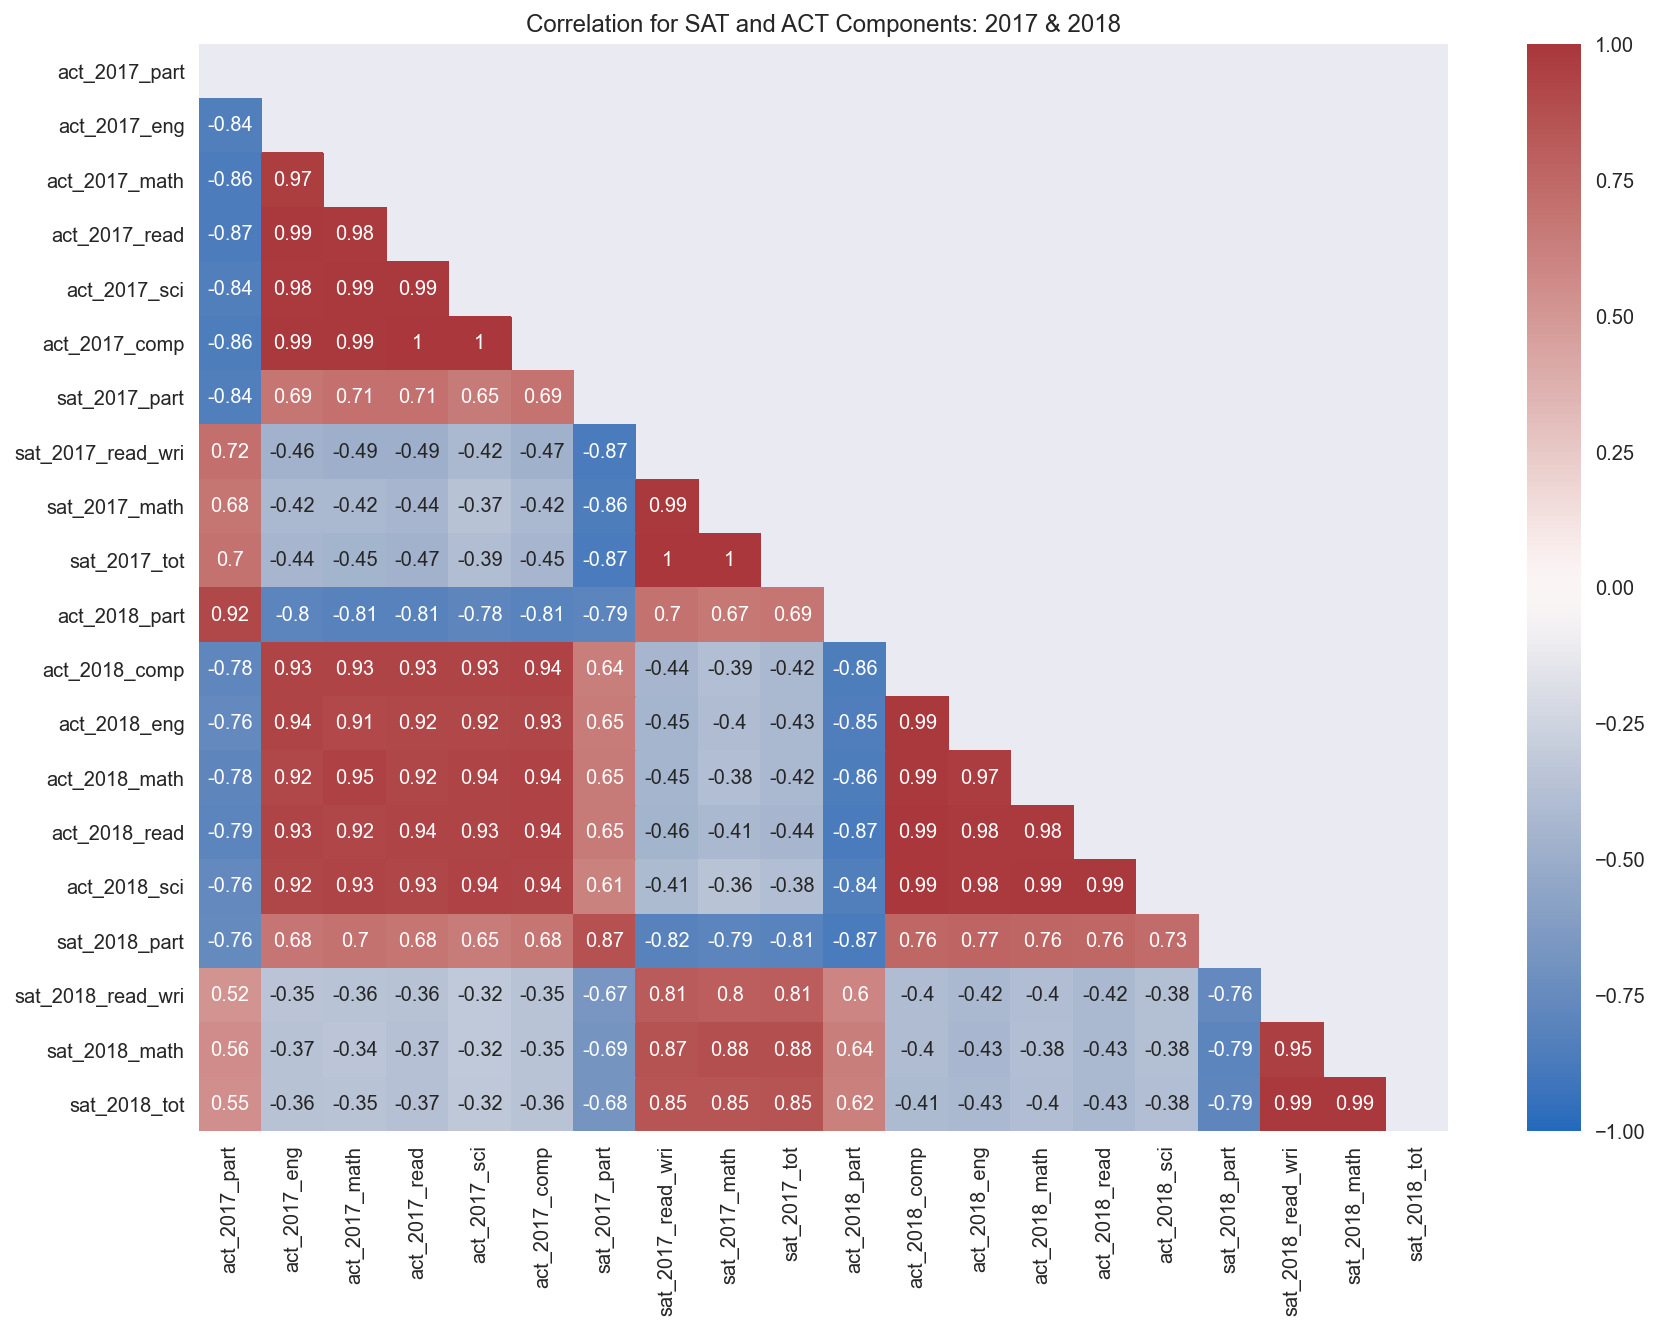

In [95]:
# set figure size
plt.figure(figsize=(14, 10))
corr = df_combined.corr()
# set mask to select only lower portions
mask = np.triu(corr)
# run heatmap, with corr shown and rounded to 2 fig and with mask
sns.heatmap(corr, annot=True, fmt='.2g', vmin=-1, vmax=1, mask=mask, cmap='vlag')
plt.title('Correlation for SAT and ACT Components: 2017 & 2018');

Individual ACT and SAT components are highly correlated with each other and across both years as well, for eg, correlation for sat_2017_math and sat_2017_read_wri = 0.99, and act_2017_eng and act_2018_eng = 0.94. 

High scores in one particular section tend to lead to high scores in other sections of the same exam within the same year. Similarly, high scores in a section in 2017 tend to also indicate high scores in the same section in 2018. 

Additionally, participation rates for that particular year for the particular exam is negatively correlated to scores in that particular exam, whereas it is positively correlated to the other exam's scores. For eg, high sat_2017 participation rates leads to lower sat_2017_maths or lower sat_2017_read_wri scores but high sat_2017 participation rates leads to high act_2017_math or act_2017_read scores.


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [96]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    num_rows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    # adjust figure size, to make sideways comparison, we set y-axis (frequency) to have the same scale
    fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize = (15, 5*num_rows), sharey=True,)
    # adjust the space between the rows to be bigger, and make gap between columns to be smaller
    plt.subplots_adjust(hspace=0.3, wspace=0.05)
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        # create different colors for left column and right column
        if i%2 ==0:
            ax[i].hist(dataframe[column], color='salmon', edgecolor='slategray', linewidth=0.5)
            ax[i].axvline(dataframe[column].mean(), label=f'mean ={round(dataframe[column].mean(),1)}', ls='--')
            ax[i].axvline(dataframe[column].median(), label=f'median ={round(dataframe[column].median(),1)}', ls=':')
            ax[i].set_ylabel('Frequency (count)', fontsize=12)
            
        else:
            ax[i].hist(dataframe[column], color='skyblue', edgecolor='slategray', linewidth=0.5)
            ax[i].axvline(dataframe[column].mean(), label=f'mean = {round(dataframe[column].mean(),1)}', ls='--')
            ax[i].axvline(dataframe[column].median(), label=f'median = {round(dataframe[column].median(),1)}', ls=':')
            
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=12)
        ax[i].set_title(list_of_titles[i].upper(), fontsize=16, fontweight='bold')
        ax[i].legend()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

**Participation Rates**

In [97]:
columns_part = ['sat_2017_part', 'sat_2018_part', 'act_2017_part', 'act_2018_part']
titles_part = ['SAT 2017 participation rates (%)', 
               'SAT 2018 participation rates (%)', 
               'ACT 2017 participation rates (%)',
               'ACT 2018 participation rates (%)',
              ]
xlabels_part = ['percentages (%)']*4

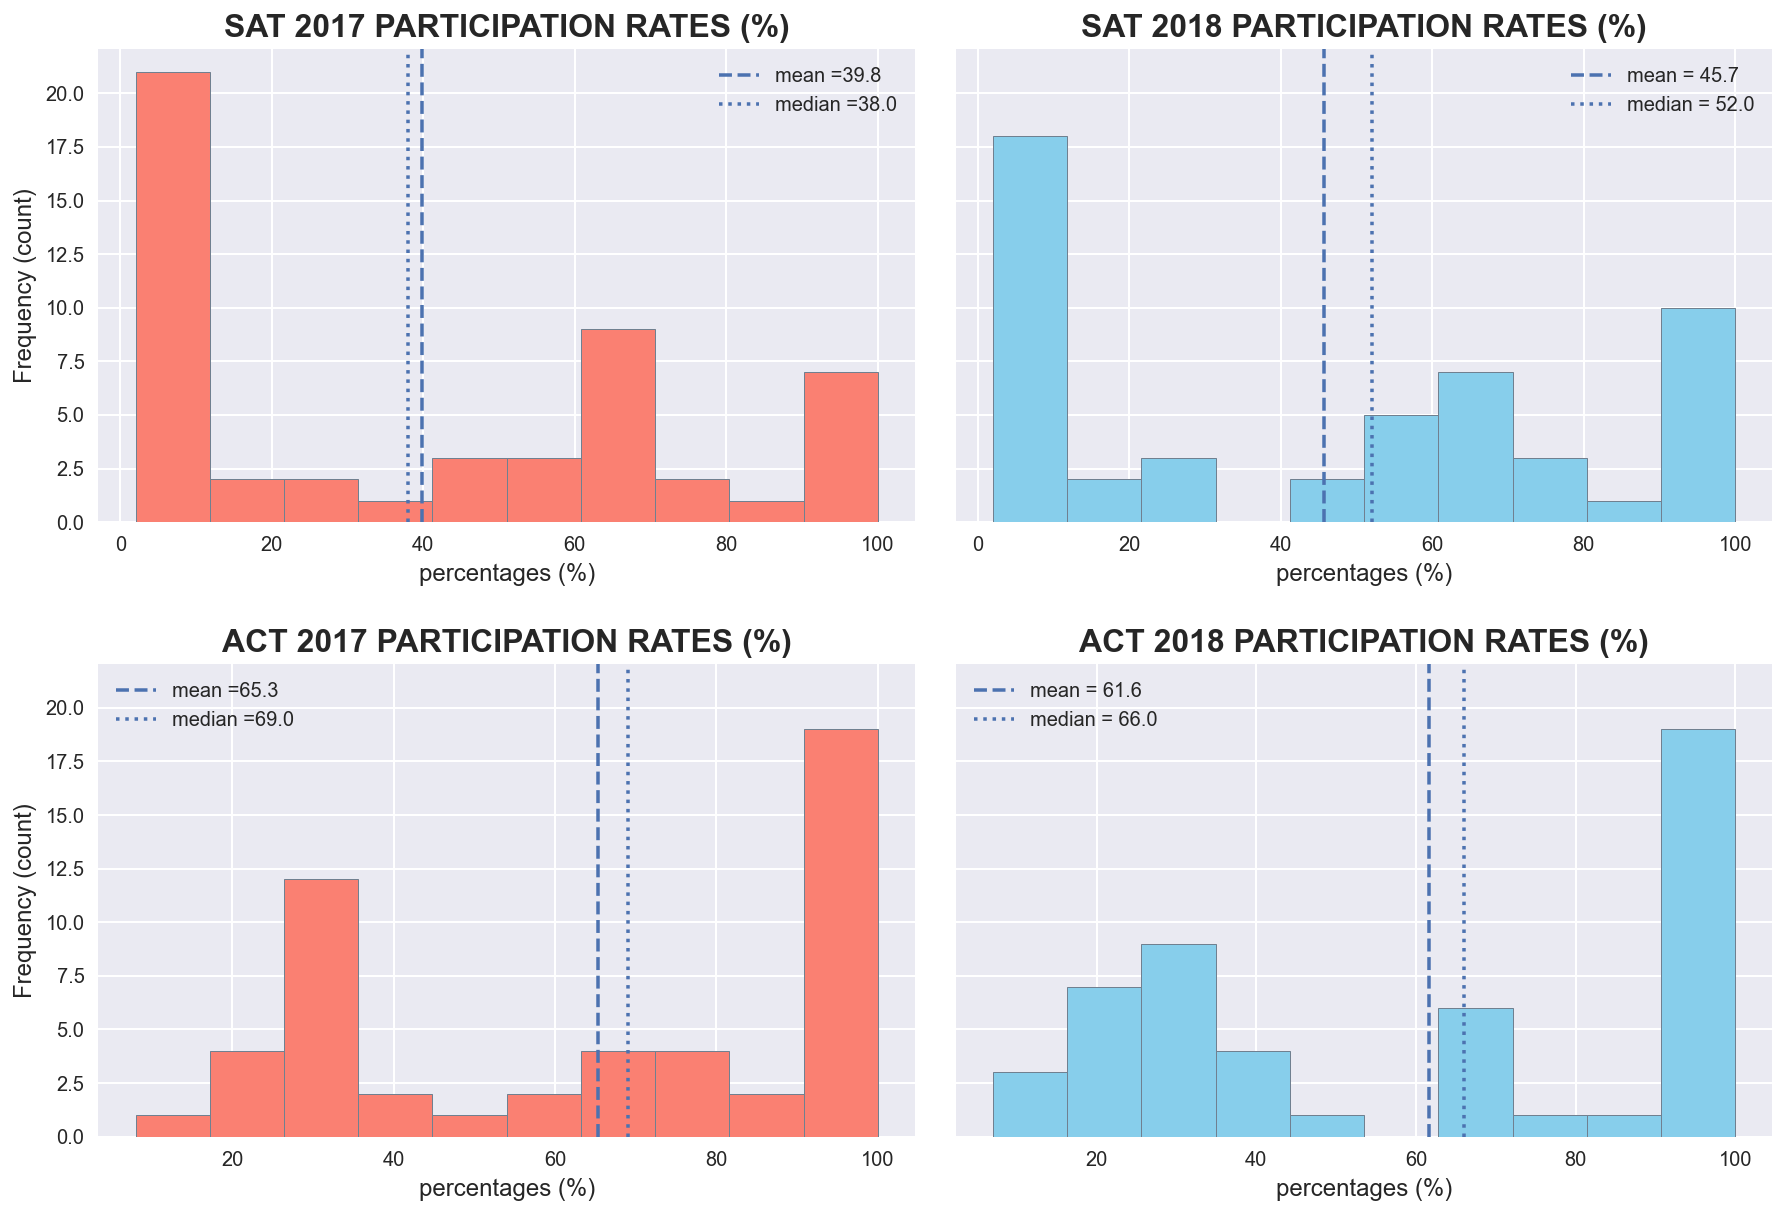

In [98]:
subplot_histograms(df_combined, columns_part, titles_part, xlabels_part)

For SAT, a high number of states have low participation rates with mean hovering around the 40% range in both 2017 (39.8%) and 2018 (45.7%). We also see many states with less than 10% participation rates in 2017 (more than 20 states) and 2018 (~18 states). While we see an overall improvement in the participation rates from 2017 to 2018, where the bars are showing a higher bulge above 50% in 2018, with the mean and median improvement from (39.8% to 45.7%) and (38% to 52%) respectively. However, this still lags behind overall ACT participation rates. 
    
For ACT, it feels like a mirror image of the SAT participation rate histogram for each year. We have a high number of states having more than 90% participation rates in 2017 as well as in 2018 (both around 18 states). The overall mean participation rates is higher compared to the SAT as well in 2017 (65.3%) and 2018 (61.6%). There are fewer states with less than 10% participation rates for the ACT as well. 
    
Overall, we get the impression that the SAT lags behind the ACT in participation rates for both 2017 and 2018. However, if we were to look at the trend, SAT has improved on its average participation rates by 5.9 ppt while ACT avearage participation rates has declined by 3.7 ppt from 2017 to 2018. During this time, the SAT has been gaining acceptance with high schools at the expense of the ACT. 


**Math Scores**

In [99]:
columns_math = ['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math']
titles_math = ['SAT 2017 math scores', 
               'SAT 2018 math scores',
               'ACT 2017 math scores',
               'ACT 2018 math scores',
              ]

xlabels_math = ['average score']*4

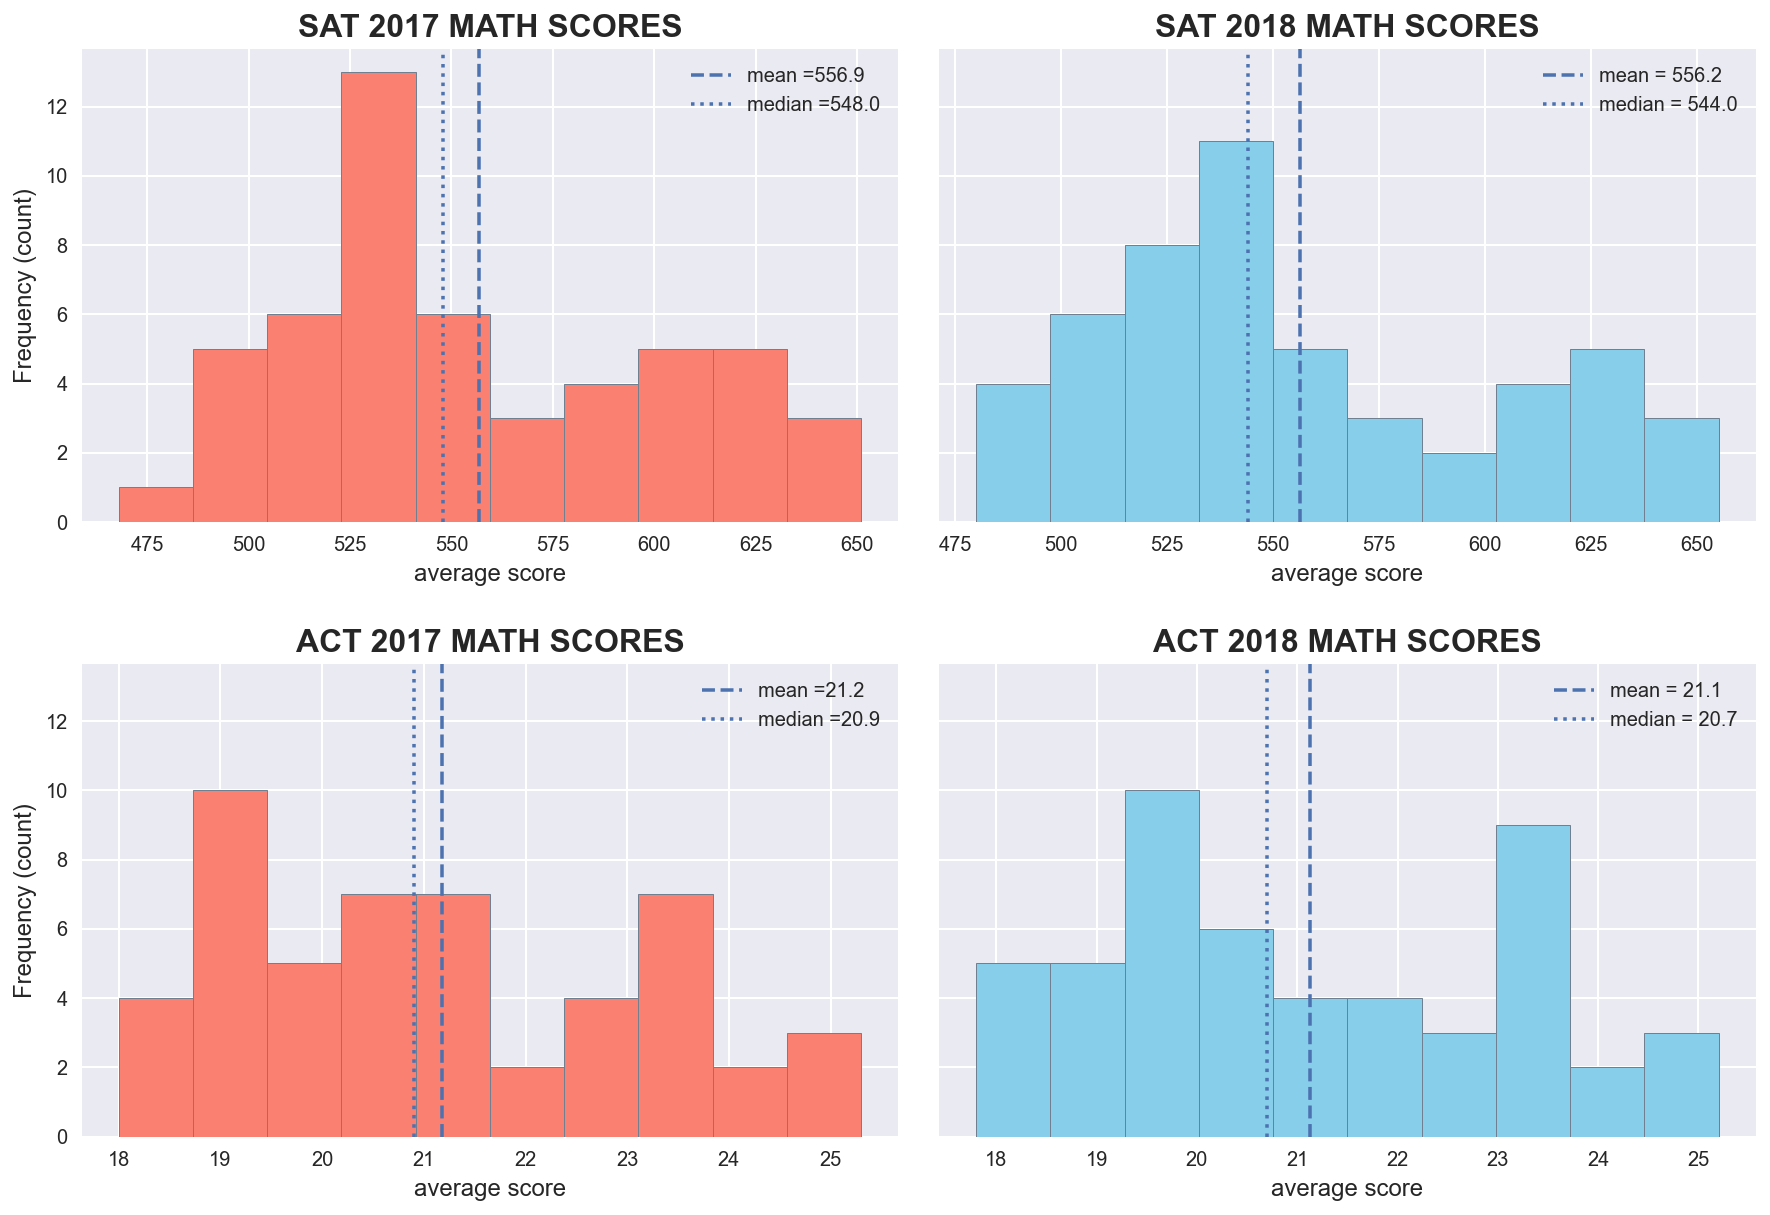

In [100]:
subplot_histograms(df_combined, columns_math, titles_math, xlabels_math)

For the SAT, the average Math scores have almost identical means in 2017 (556.9) and 2018( 556.2) as well as the median in 2017 (548) and 2018 (544). The histogram distribution is fairly consistent above the 550 points mark in 2017. In 2017, a large number of states (13) scored within the 525-550 range showing a tall bar whereas in 2018 the bottom half of the histogram shows a gradual step-like descend. 

Similarly, for the ACT, the average Math scores have almost identical means and median in 2017 (21.2, 20.9 respectively) and 2018 (21.1, 20.7). The histogram across both years showed that states were distributed fairly uniformly at the left tail, however, in 2018, we do see 2 tall bars in the 19-20 and 23-24 average score range. 

Overall, the impression is that the average math scores are fairly consistent across both 2017 and 2018. Due to the difference in scoring methods, like for like comparison between ACT and SAT average maths score might not be feasible.

**Verbal and Reading Section**

In [101]:
columns_read = ['sat_2017_read_wri', 'sat_2018_read_wri', 'act_2017_eng', 'act_2018_eng',
                'act_2017_read', 'act_2018_read',]
titles_read = ['SAT 2017 Evidence-based reading & writing', 
               'SAT 2018 Evidence-based reading & writing', 
               'ACT 2017 english',
               'ACT 2018 english',
               'ACT 2017 reading',
               'ACT 2018 reading',
              ]
xlabels_read = ['average score for each state']*6

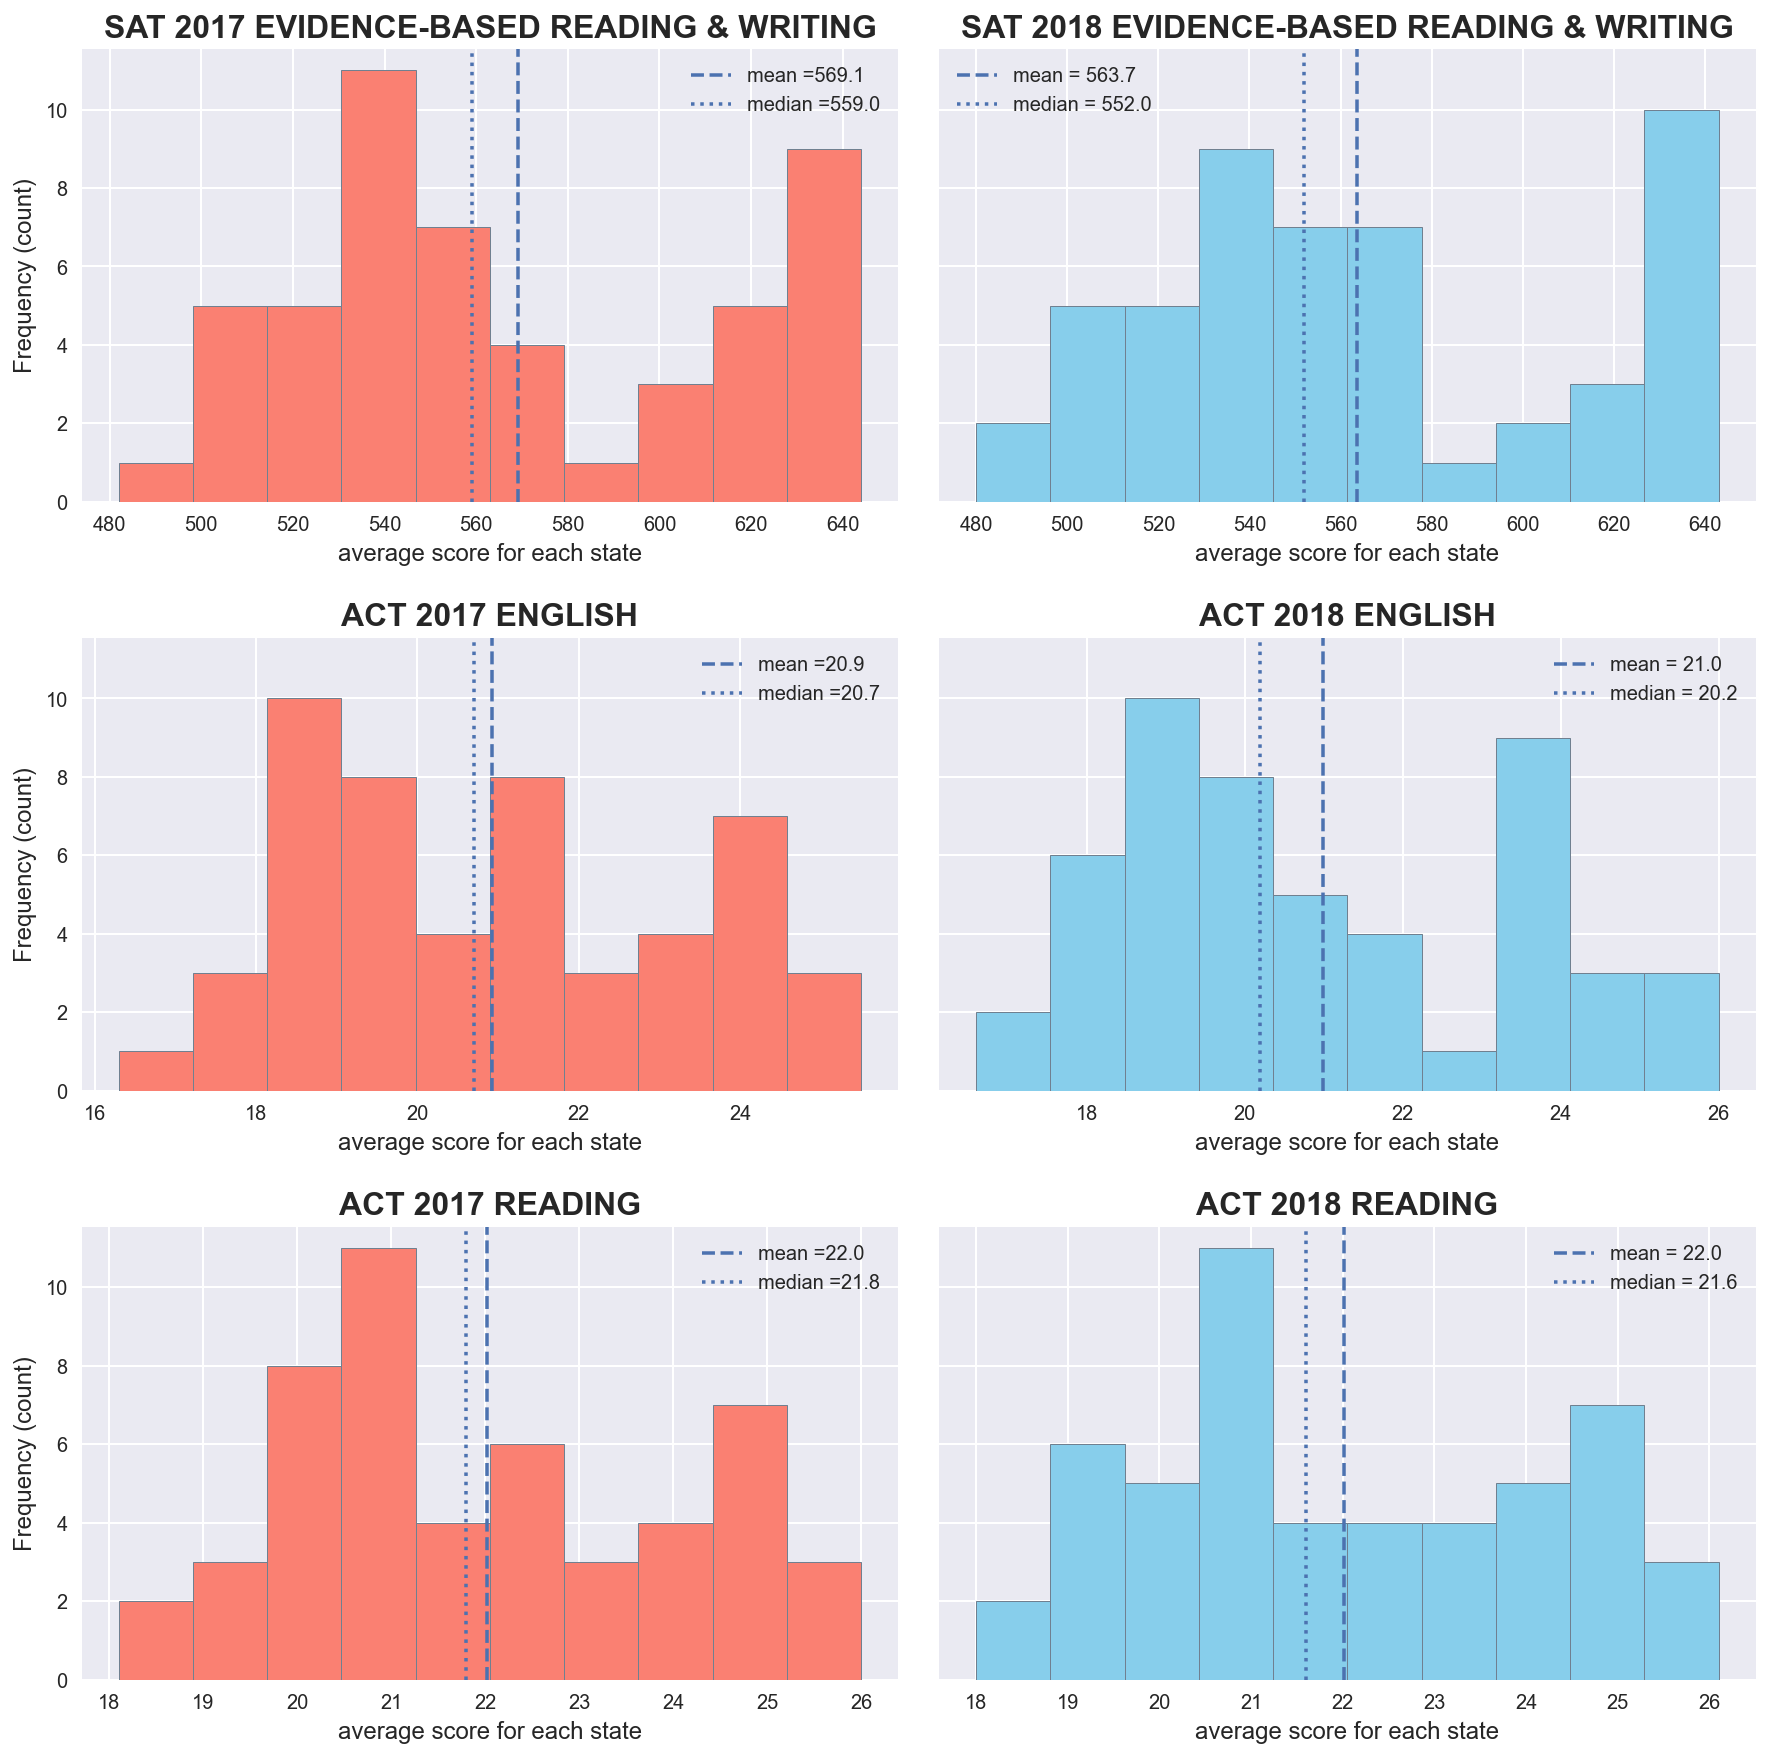

In [102]:
subplot_histograms(df_combined, columns_read, titles_read, xlabels_read)

For SAT, the shape of the histogram remained consistent with mean and median largely equal in 2017 (569.1, 559.0) and 2018 (563.7, 552) though it has fallen slightly. we observed a large bulge in the right tail in both years, creating a right skew. 
<br>
    
For ACT English scores, while the mean is similar (2017: 20.9, 2018: 21.0), the median shows some divergence (2017: 20.7, 2018: 20.2). Both histograms show right skew, a large number scoring above the mean, however, this is more obvious in 2018 where a large group (~9 states) scored in the 23-24 point range, thus moving the mean rightwards.
    
For ACT Reading scores, the mean and median is similarly equal in 2017 (22.0, 21.8) and 2018 (22.0, 21.6). In 2018, the right side of the histogram is spread more evenly whereas in 2017, the right side of the histogram has a few bulges in the 22-23 and 25 point range. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


**SAT vs. ACT math scores for 2017**

In [103]:
# set variable data to be our combined dataframe
data = df_combined

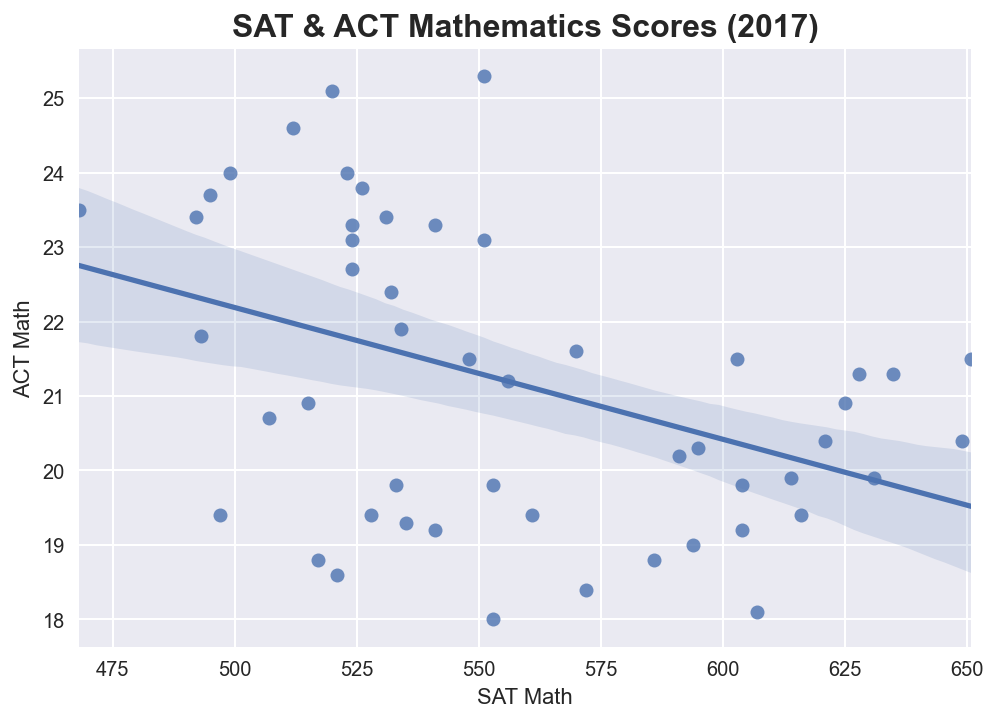

In [104]:
# use seaborn scatter plot with regression line (.regplot())
ax = sns.regplot(x=data.sat_2017_math, y=data.act_2017_math)
ax.set_title('SAT & ACT Mathematics Scores (2017)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Math')
ax.set_ylabel('ACT Math');


SAT and ACT Math scores in 2017 looks to be negatively correlated, although the relationship is not strong. 

**SAT vs. ACT verbal/reading scores for 2017**

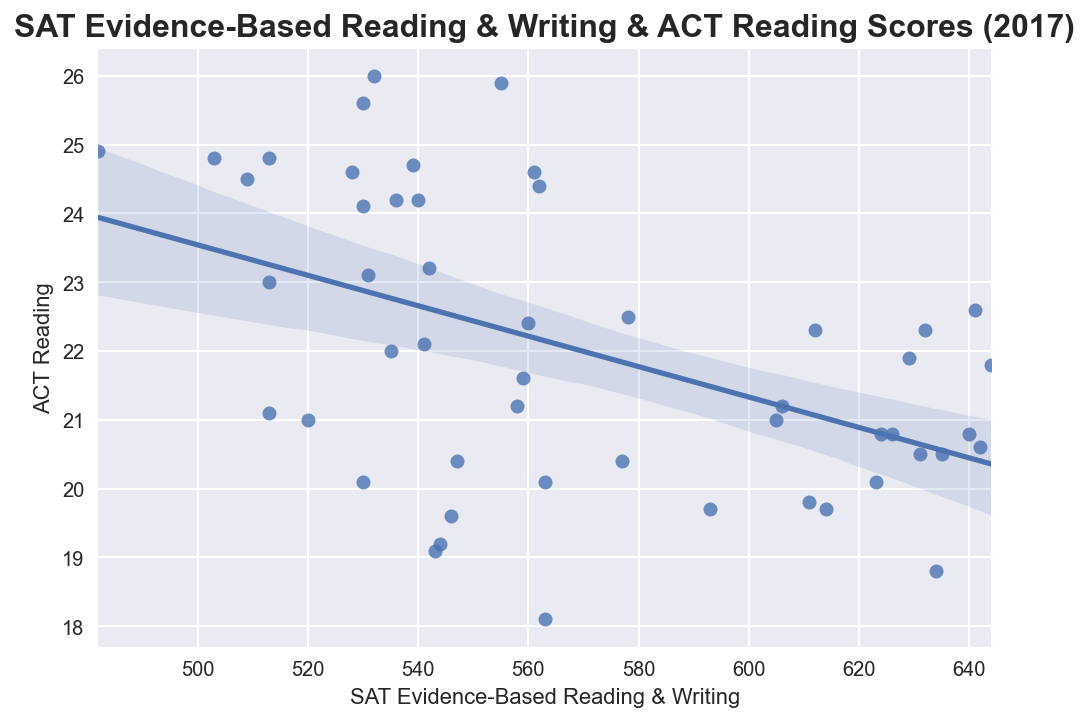

In [105]:
ax = sns.regplot(x=data.sat_2017_read_wri, y=data.act_2017_read)
ax.set_title('SAT Evidence-Based Reading & Writing & ACT Reading Scores (2017)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Evidence-Based Reading & Writing')
ax.set_ylabel('ACT Reading');

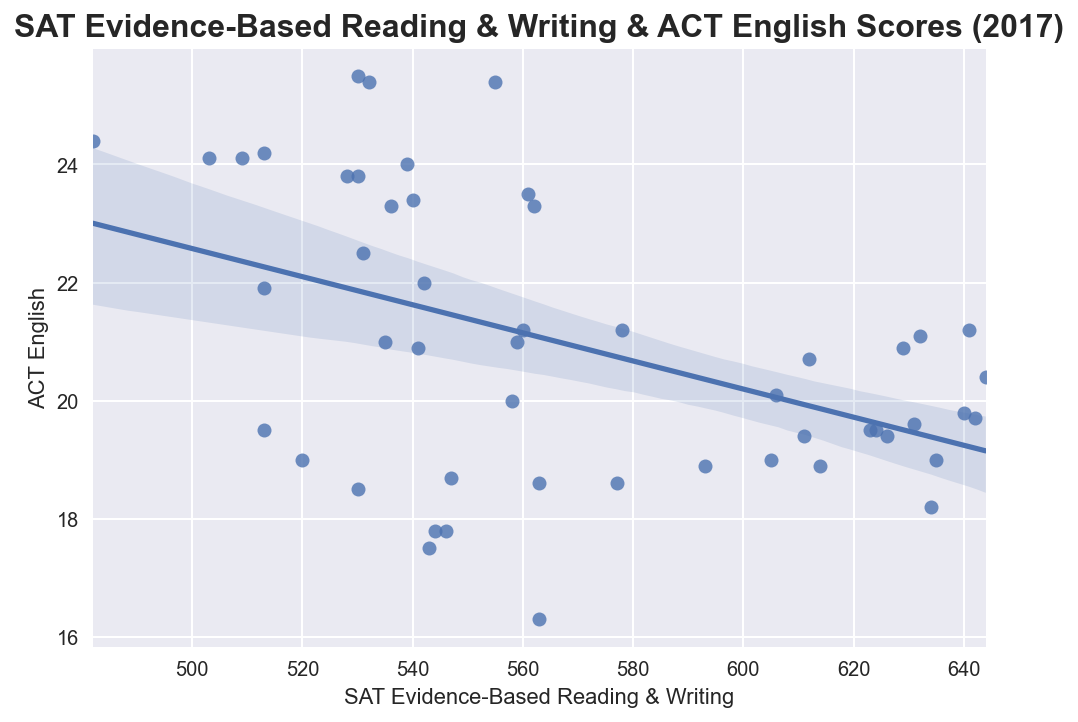

In [106]:
ax = sns.regplot(x=data.sat_2017_read_wri, y=data.act_2017_eng)
ax.set_title('SAT Evidence-Based Reading & Writing & ACT English Scores (2017)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Evidence-Based Reading & Writing')
ax.set_ylabel('ACT English');

Likewise, SAT Evidence based Reading and Writing and ACT Reading and ACT English scores in 2017 looks to be negatively correlated, although the relationship is not strong. 

**SAT vs. ACT total/composite scores for 2017**

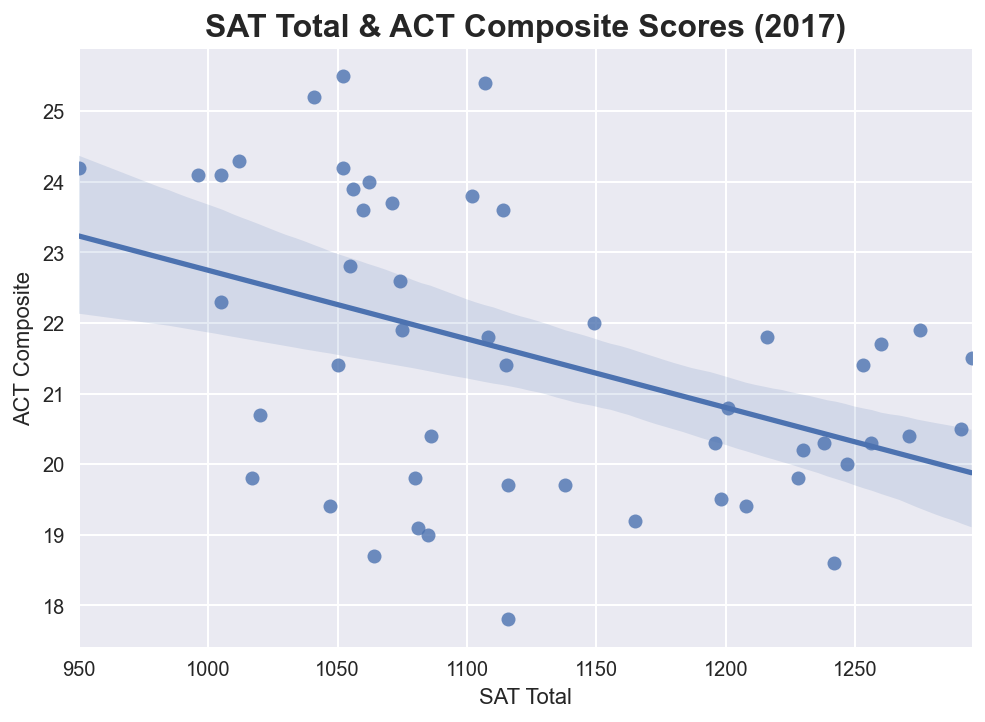

In [107]:
ax = sns.regplot(x=data.sat_2017_tot, y=data.act_2017_comp)
ax.set_title('SAT Total & ACT Composite Scores (2017)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Total')
ax.set_ylabel('ACT Composite');

Likewise, SAT Total and ACT Composite scores in 2017 looks to be negatively correlated, although the relationship is not strong. 

Overall, for the comparisons between SAT and ACT scores in related sections within the same year, all the scatter plots show a negative relationships between the 2 variables compared. Intuitively, this makes little sense as we would expect each state to achieve similar relative score range in the same section, for example the Mathematics section for both the SAT and ACT. We will dicuss more in the inferences section

**Total scores for SAT 2017 vs. 2018**

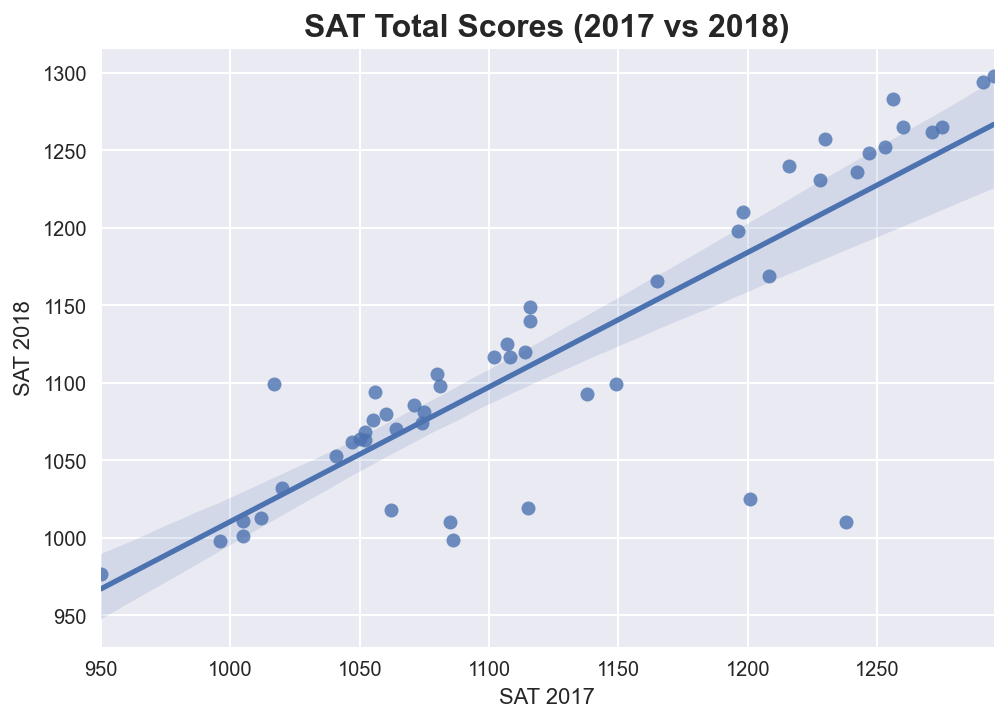

In [108]:
ax = sns.regplot(x=data.sat_2017_tot, y=data.sat_2018_tot)
ax.set_title('SAT Total Scores (2017 vs 2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT 2017')
ax.set_ylabel('SAT 2018');

SAT Total scores in 2017 and 2018 is positively correlated, the trendline looks to fit the scatter plot nicely, although a few outliers with high SAT 2017 Total but low SAT 2018 Total are noted. 

**Composite scores for ACT 2017 vs. 2018**

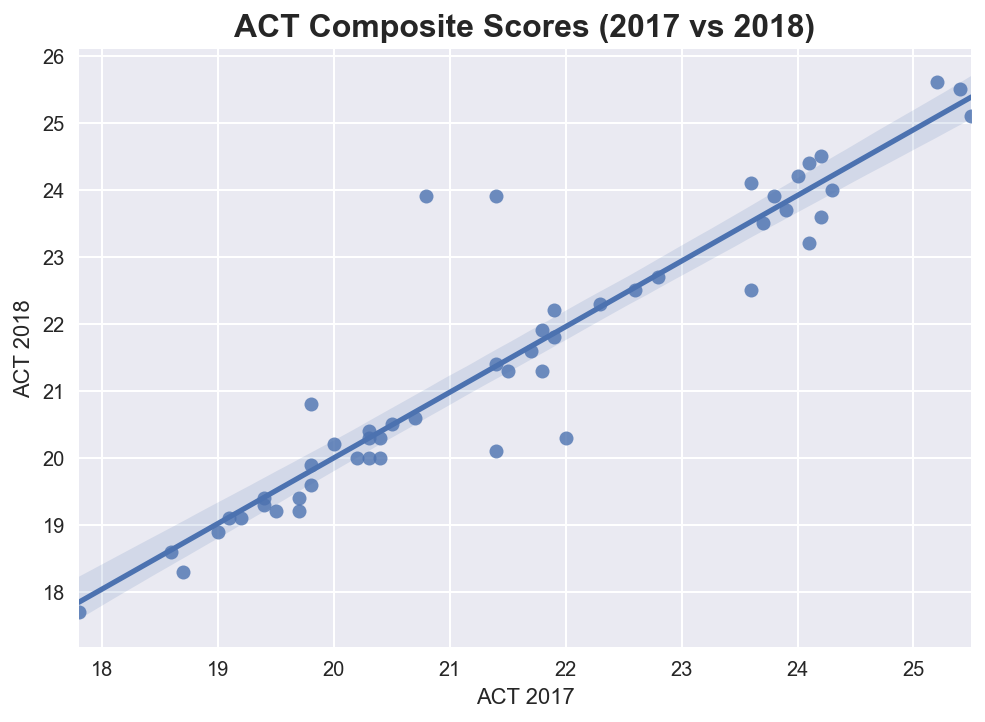

In [109]:
ax = sns.regplot(x=data.act_2017_comp, y=data.act_2018_comp)
ax.set_title('ACT Composite Scores (2017 vs 2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('ACT 2017')
ax.set_ylabel('ACT 2018');

Likewise, ACT Composite scores in 2017 and 2018 is positively correlated, the trendline looks to fit the scatter plot nicely, although 2 particular outliers with low ACT 2017 Total but high SAT 2018 Total are noted. 

For comparisons on each tests total score between the 2 years show high correlated relationship between SAT Total for 2017 and 2018 as well as ACT Composite for 2017 and 2018. This would be largely expected as we would expect each state to achieve similar scores from year to year. 
Additionally, there are a few observations that are distanced from the overall trend line. One possibility would be that these are the flipped states, i.e, states that flipped from high SAT participation rates to taking the ACT instead, and vice versa.   

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [110]:
# create sub dataframe that groups variable of interest together for plotting
box_part = df_combined[['sat_2017_part',
                        'sat_2018_part',
                        'act_2017_part',
                        'act_2018_part',
                      ]]

# SAT total scores cannot be included as they range from 400-1600
box_sat = df_combined[['sat_2017_read_wri',                       
                       'sat_2018_read_wri',
                       'sat_2017_math',
                       'sat_2018_math',
                      ]]

box_sat_tot = df_combined[['sat_2017_tot',
                           'sat_2018_tot',
                      ]]

box_act = df_combined[['act_2017_eng',
                       'act_2018_eng',
                       'act_2017_read',
                       'act_2018_read',
                       'act_2017_math',
                       'act_2018_math',
                       'act_2017_sci',
                       'act_2018_sci',
                       'act_2017_comp',                                            
                       'act_2018_comp',
                      ]]

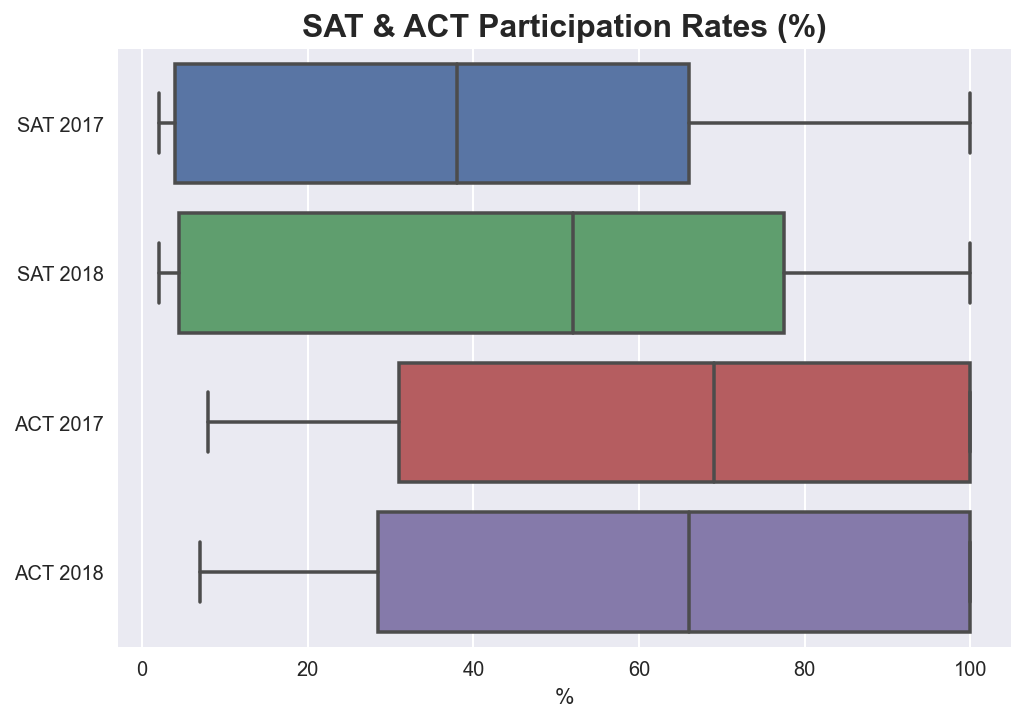

In [111]:
ax = sns.boxplot(data=box_part, orient="h")
ax.set_title('SAT & ACT Participation Rates (%)', fontsize='16', fontweight='bold')
ax.set_yticklabels(['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'])
ax.set_xlabel('%');

Participation rates for the SAT improved from 2017 to 2018 with the median and 75th percentile line increasing while the 25th percentile remained largely similar resulting in the IQR increasing in 2018. The boxplot ranges from a very low value of below 10 to a high of 100. 
<br>
    
Meanwhile, participation rates for the ACT show high right skew as both the 75th percentile and the maximum are the same, probably as a large number of values are 100%. However, we observed that the median and 25th percentile has fallen, resulting in a slight increase in the IQR in 2018.

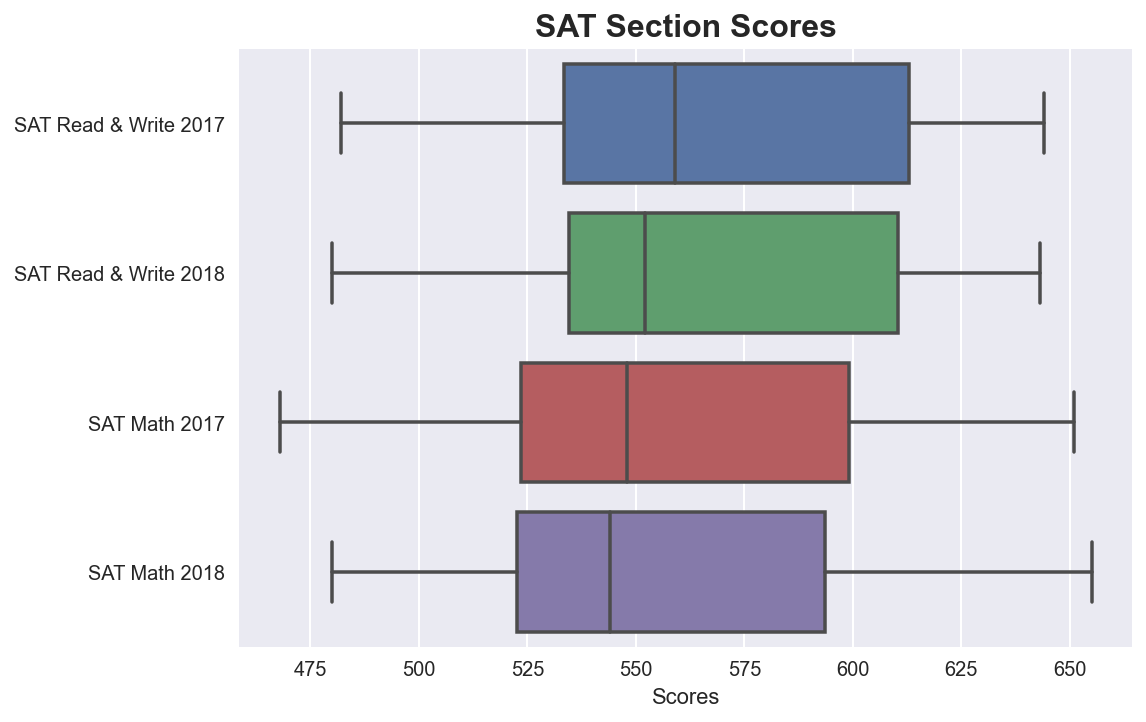

In [112]:
ax = sns.boxplot(data=box_sat, orient="h")
ax.set_title('SAT Section Scores', fontsize='16', fontweight='bold')
ax.set_yticklabels(['SAT Read & Write 2017', 
                    'SAT Read & Write 2018', 
                    'SAT Math 2017',
                    'SAT Math 2018'])
ax.set_xlabel('Scores');

SAT Evidence-based Reading and Writing showed a decrease in the median from 2017 to 2018, this implies a larger proportion scoring in the 0-50th percentile in 2018 compared to 2017. Furthermore, the IQR has narrowed slightly in 2018, with the 25th and 75th percentile converging towards the median. 2018 has a slightly lower minimum compared to 2017. 
<br>
    
For SAT Maths, the median has similarly fallen in 2018 but both the min and max has increased when compared to 2017. Even though the 25th percentile has decreased, there was a larger decrease in the 75th percentile which caused an overall narrower IQR in 2018. 

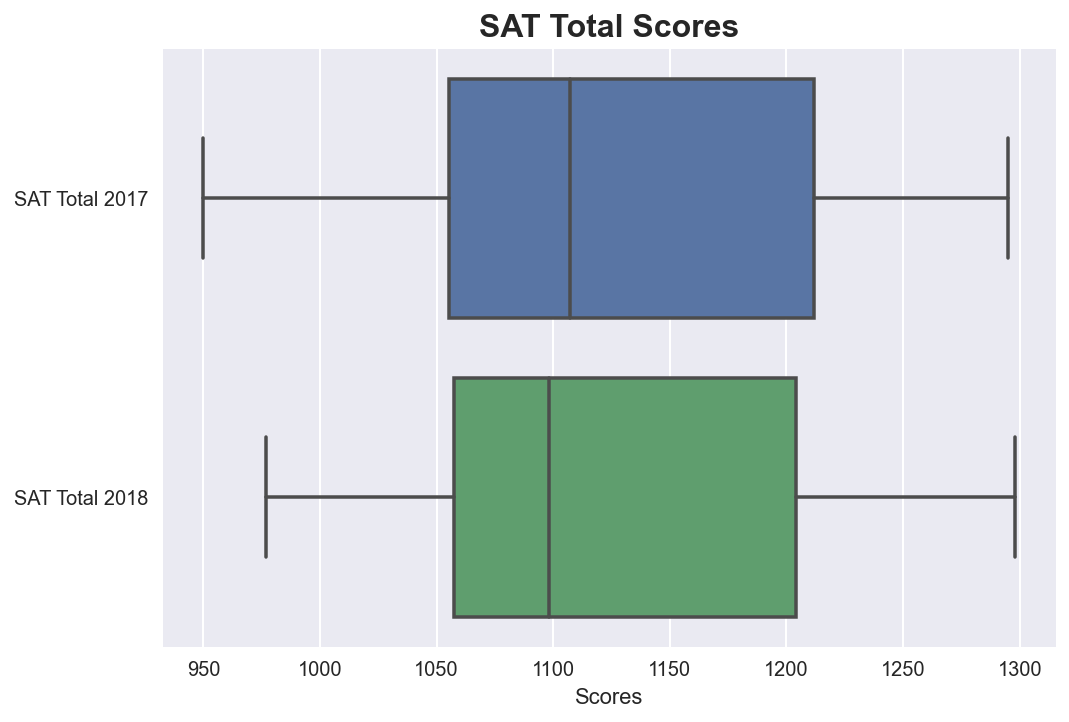

In [113]:
ax = sns.boxplot(data=box_sat_tot, orient="h")
ax.set_title('SAT Total Scores', fontsize='16', fontweight='bold')
ax.set_yticklabels(['SAT Total 2017', 
                    'SAT Total 2018',])
ax.set_xlabel('Scores');

SAT Total scores showed a decrease in the median from 2017 to 2018, as well as a narrowing of the IQR. This implies a larger proportion of scores in the 25-75th percentile in 2018 compared to 2017. The max has increased slightly while the min score showed a significant increase in 2018. 

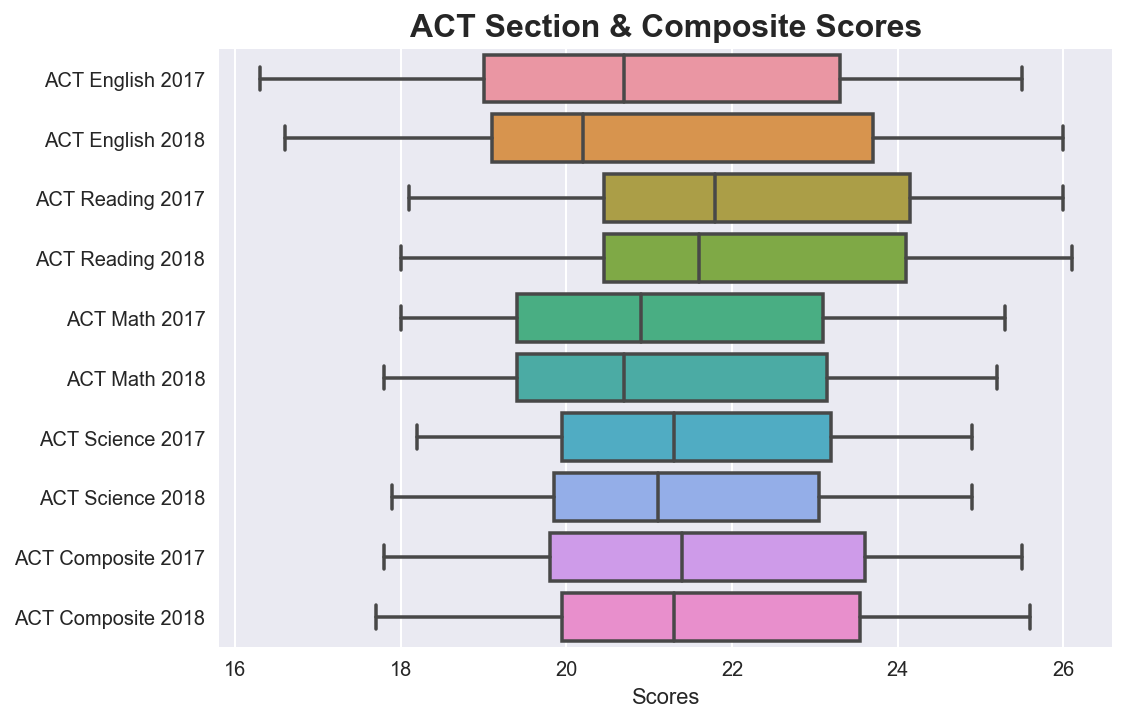

In [114]:
ax = sns.boxplot(data=box_act, orient="h")
ax.set_title('ACT Section & Composite Scores', fontsize='16', fontweight='bold')
ax.set_yticklabels(['ACT English 2017', 
                    'ACT English 2018',
                    'ACT Reading 2017', 
                    'ACT Reading 2018',
                    'ACT Math 2017', 
                    'ACT Math 2018',
                    'ACT Science 2017',
                    'ACT Science 2018',
                    'ACT Composite 2017',                     
                    'ACT Composite 2018',
                   ])
ax.set_xlabel('Scores');

ACT Englsh: Both the min, max, 25th, and 75th percentile increased in 2018 compared to 2017. Meanwhile the median has fallen in 2018. We observed that the 25th percentile to median is very narrow in 2018, even though it contains 25% of all the scores, if we were to plot the histogram, we should observed a high frequency bar in this range. 
<br>
    
ACT Reading: The min, median and 75th percentile has decreased while the max has increased in 2018. Meanwhile, the 25th percentile is largely the same. This leads to a wider distribution in 2018 compared to 2017. Similarly, in 2018, the 25th percentile to median is very narrow. 
<br>
    
ACT Math: The min, median and max has fallen while the 75th percentile increased in 2018. The 50th percentile to max range is longer, meaning that the top 50% of the scores are more spread out in 2018 than compared to in 2017.
<br>
    
ACT Science: The min, 25th, median and 75th percentile have all fallen while the max remained largely the same in 2018. This overall leads to a wider distribution in 2018 than compared to in 2017. 
<br>
    
ACT Composite: Overall, we have a wider distribution as the min has decreased while the max has increased in 2018. We observed a narrowing of the IQR with the 25th and 75th percentile converging towards the median in 2018, hence more scores are now clustered around the median. Meanwhile, the median decreased slightly in 2018. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [115]:
# from our df_combined, we create new database df_map and insert a new column for US state codes
df_map = df_combined.copy()

state_codes = {'District of Columbia': 'DC',
               'Mississippi': 'MS', 
               'Oklahoma': 'OK', 
               'Delaware': 'DE', 
               'Minnesota': 'MN', 
               'Illinois': 'IL', 
               'Arkansas': 'AR', 
               'New Mexico': 'NM', 
               'Indiana': 'IN', 
               'Maryland': 'MD', 
               'Louisiana': 'LA', 
               'Idaho': 'ID', 
               'Wyoming': 'WY', 
               'Tennessee': 'TN', 
               'Arizona': 'AZ', 
               'Iowa': 'IA', 
               'Michigan': 'MI', 
               'Kansas': 'KS', 
               'Utah': 'UT', 
               'Virginia': 'VA', 
               'Oregon': 'OR', 
               'Connecticut': 'CT', 
               'Montana': 'MT', 
               'California': 'CA', 
               'Massachusetts': 'MA', 
               'West Virginia': 'WV', 
               'South Carolina': 'SC', 
               'New Hampshire': 'NH', 
               'Wisconsin': 'WI',
               'Vermont': 'VT', 
               'Georgia': 'GA', 
               'North Dakota': 'ND', 
               'Pennsylvania': 'PA', 
               'Florida': 'FL', 
               'Alaska': 'AK', 
               'Kentucky': 'KY', 
               'Hawaii': 'HI', 
               'Nebraska': 'NE', 
               'Missouri': 'MO', 
               'Ohio': 'OH', 
               'Alabama': 'AL', 
               'Rhode Island': 'RI', 
               'South Dakota': 'SD', 
               'Colorado': 'CO', 
               'New Jersey': 'NJ', 
               'Washington': 'WA', 
               'North Carolina': 'NC', 
               'New York': 'NY', 
               'Texas': 'TX', 
               'Nevada': 'NV', 
               'Maine': 'ME'}

df_map['state_code'] = df_map['state'].apply(lambda x : state_codes[x])

In [116]:
# create a function to plot the choropleth map
def plot_map(df, column, title, category='act'):
    
    fig = go.Figure(data=go.Choropleth(
        locations = df['state_code'],
        locationmode = 'USA-states',
        z = df[column],
        colorscale = 'Blues' if category=='act' else 'Reds',
        marker_line_color = 'black',
        marker_line_width = 0.5,
    ))

    fig.update_layout(
        autosize=False,
        width=600,
        height=400,
        title_text = title,
        title_x = 0.5,
        geo_scope='usa',
    )
    fig.show()

In [117]:
# we plot all the SAT components, 
# with each related component grouped together (eg part for 2017 & 2018)
plot_map(df_map, 'sat_2017_part', '2017 SAT Participation (%)', 'sat')

In [118]:
plot_map(df_map, 'sat_2018_part', '2018 SAT Participation (%)', 'sat')

In [119]:
plot_map(df_map, 'sat_2017_read_wri', '2017 SAT Evidence-based Reading & Writing', 'sat')

In [120]:
plot_map(df_map, 'sat_2018_read_wri', '2018 SAT Evidence-based Reading & Writing', 'sat')

In [121]:
plot_map(df_map, 'sat_2017_math', '2017 SAT Mathematics Score', 'sat')

In [122]:
plot_map(df_map, 'sat_2018_math', '2018 SAT Mathematics Score', 'sat')

In [123]:
plot_map(df_map, 'sat_2017_tot', '2017 SAT Total Score', 'sat')

In [124]:
plot_map(df_map, 'sat_2018_tot', '2018 SAT Total Score', 'sat')

**For SAT**
 
We observed that SAT participation improved in 2018 and that there were more states in darker red, notably Colorado (CO) and Illinois (IL). However, the highest section and total scores were actually from states that had low participation rates.

In [125]:
plot_map(df_map, 'act_2017_part', '2017 ACT Participation (%)', 'act')

In [126]:
plot_map(df_map, 'act_2018_part', '2018 ACT Participation (%)', 'act')

In [127]:
plot_map(df_map, 'act_2017_eng', '2017 ACT English Scores', 'act')

In [128]:
plot_map(df_map, 'act_2018_eng', '2018 ACT English Scores', 'act')

In [129]:
plot_map(df_map, 'act_2017_math', '2017 ACT Mathematics Score', 'act')

In [130]:
plot_map(df_map, 'act_2018_math', '2018 ACT Mathematics Score', 'act')

In [131]:
plot_map(df_map, 'act_2017_read', '2017 ACT Reading Score', 'act')

In [132]:
plot_map(df_map, 'act_2018_read', '2018 ACT Reading Score', 'act')

In [133]:
plot_map(df_map, 'act_2017_sci', '2017 ACT Science Score', 'act')

In [134]:
plot_map(df_map, 'act_2018_sci', '2018 ACT Science Score', 'act')

In [135]:
plot_map(df_map, 'act_2017_comp', '2017 ACT Comp Score', 'act')

In [136]:
plot_map(df_map, 'act_2018_comp', '2018 ACT Comp Score', 'act')

**For ACT**
 
We observed that ACT participation declined in 2018 and that there were less states in dark blue inverse of what we observed for SAT participation rates. Colorado (CO) and Illnois (IL) is now only in light blue shade for participation rates in 2018. Similarly, the highest section and total scores were actually from states that had low participation rates.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

From our graphs and choropleth maps, we would like to further investigate: 
   
1. Participation rates seem to be inversely related for both exams.
2. Participation rates and scores seems to be inversely related for both exams.
3. The 2 outliers we observed in the SAT 2017 & SAT 2018 Total scores and ACT 2017 & ACT 2018 Composite scores scatter plots.
4. Using choropleth maps to identify the states that showed large changes in participation rates

**Inverse relationship between SAT & ACT participation rates**

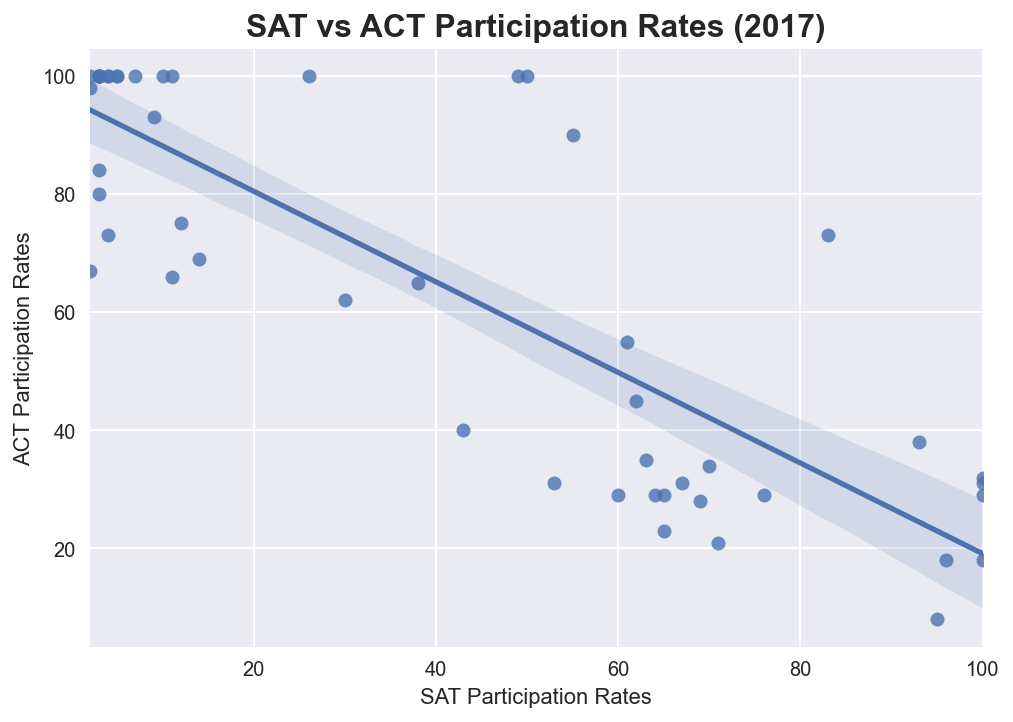

In [137]:
ax=sns.regplot(x=data.sat_2017_part, y=data.act_2017_part)
ax.set_title('SAT vs ACT Participation Rates (2017)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Participation Rates')
ax.set_ylabel('ACT Participation Rates');

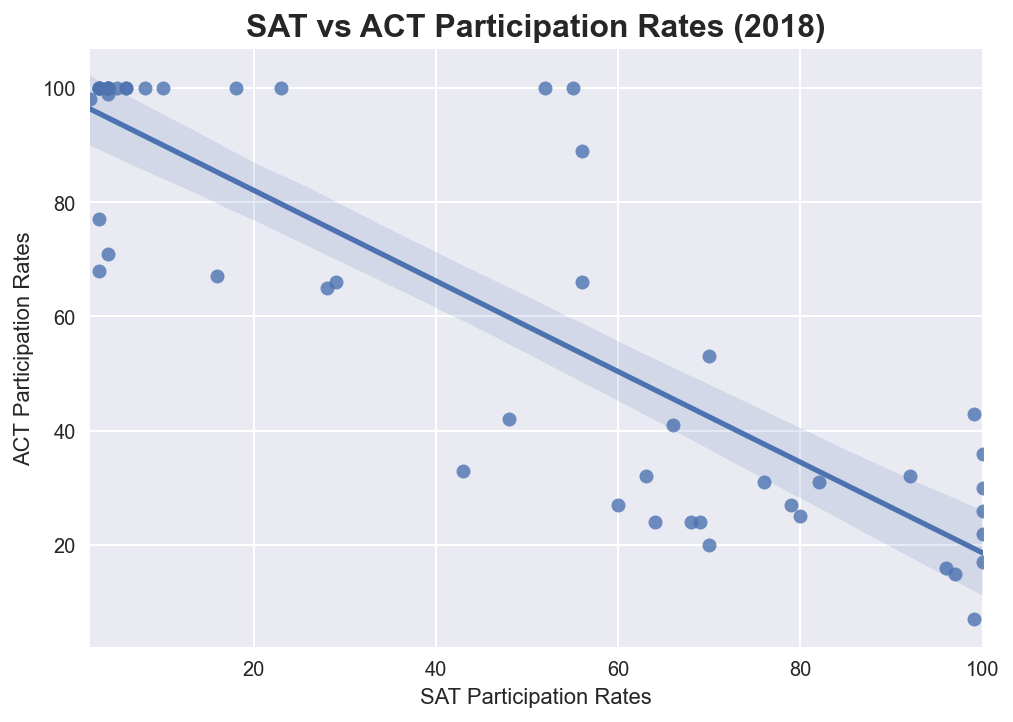

In [138]:
ax=sns.regplot(x=data.sat_2018_part, y=data.act_2018_part)
ax.set_title('SAT vs ACT Participation Rates (2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Participation Rates')
ax.set_ylabel('ACT Participation Rates');

From our scatterplots, we observed a negative relationship between the SAT & ACT participation rates. Intuitively, since students need either the ACT or the SAT for college application, there is no need to do both. On a school or state level, it also makes sense to stick to a particular exam. Therefore, a high participation rate in 1 exam would likely lead to a low participation rate in the other exam. 

**Inverse relationship between participation rates and scores**

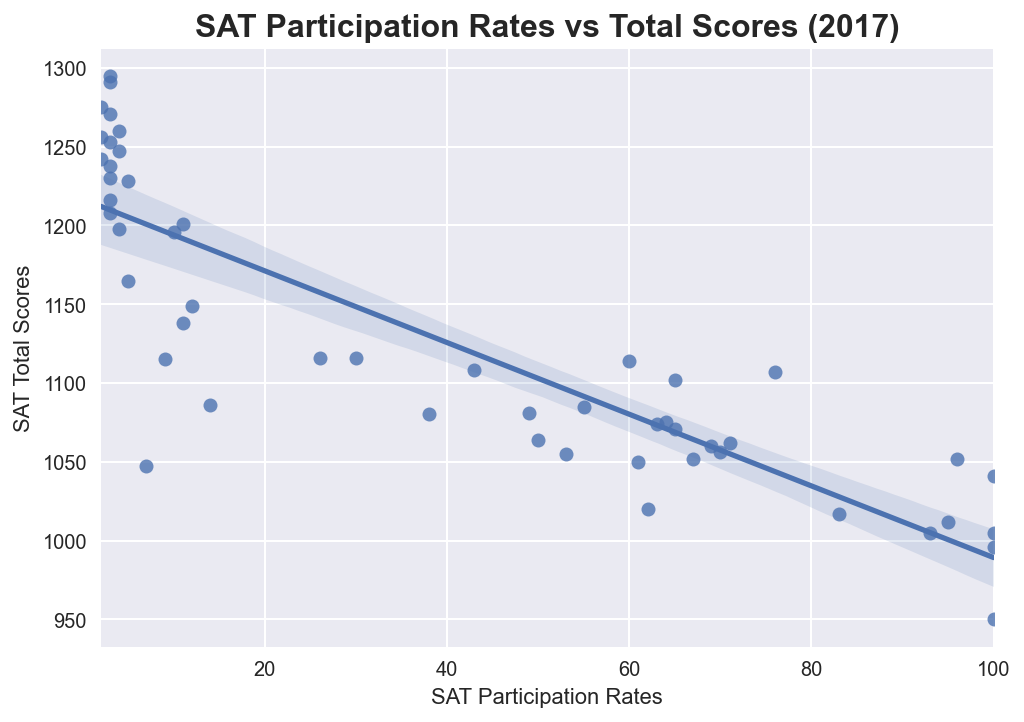

In [139]:
ax=sns.regplot(x=data.sat_2017_part, y=data.sat_2017_tot)
ax.set_title('SAT Participation Rates vs Total Scores (2017)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Participation Rates')
ax.set_ylabel('SAT Total Scores');

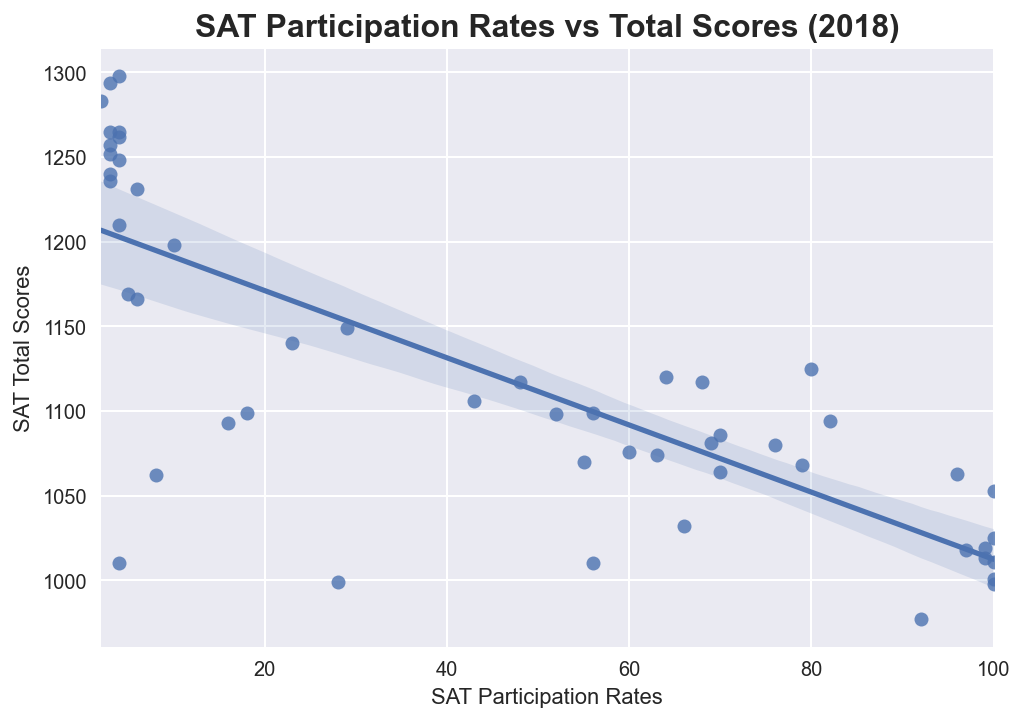

In [140]:
ax=sns.regplot(x=data.sat_2018_part, y=data.sat_2018_tot)
ax.set_title('SAT Participation Rates vs Total Scores (2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('SAT Participation Rates')
ax.set_ylabel('SAT Total Scores');

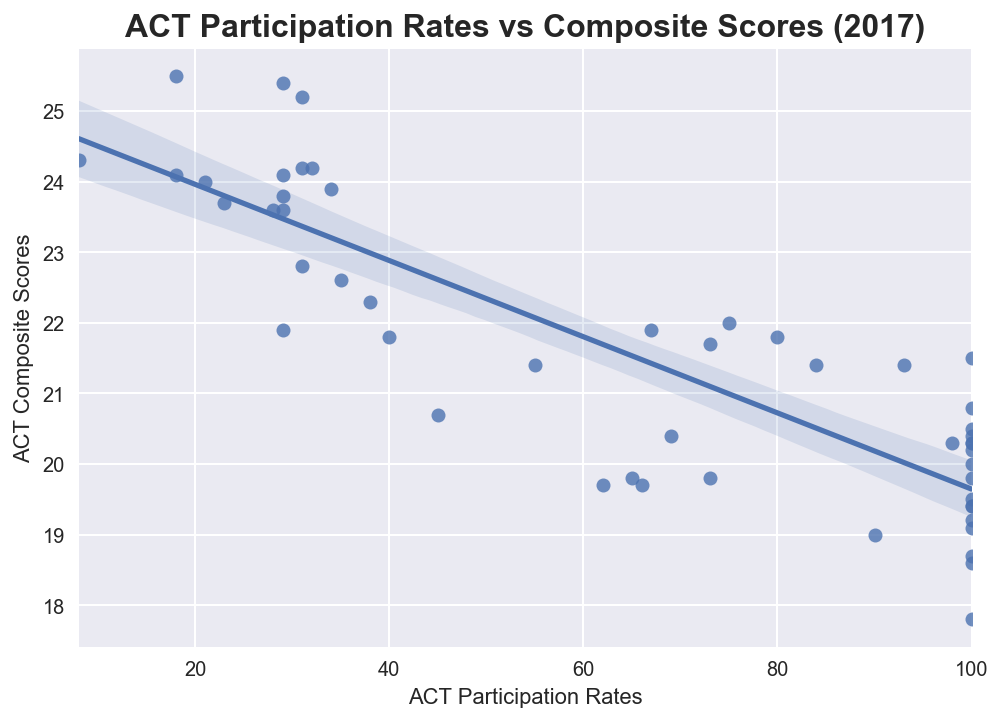

In [141]:
ax=sns.regplot(x=data.act_2017_part, y=data.act_2017_comp)
ax.set_title('ACT Participation Rates vs Composite Scores (2017)', fontsize=16, fontweight='bold')
ax.set_xlabel('ACT Participation Rates')
ax.set_ylabel('ACT Composite Scores');

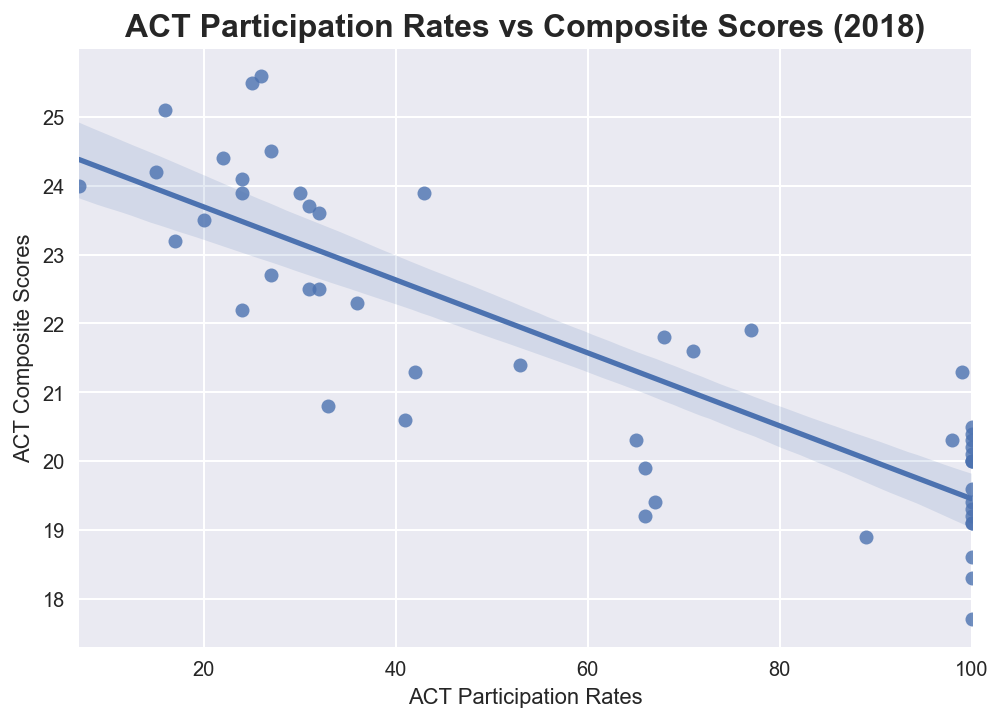

In [142]:
ax=sns.regplot(x=data.act_2018_part, y=data.act_2018_comp)
ax.set_title('ACT Participation Rates vs Composite Scores (2018)', fontsize=16, fontweight='bold')
ax.set_xlabel('ACT Participation Rates')
ax.set_ylabel('ACT Composite Scores');

Previously, we noted that high participation rates in 1 exam lead to a low participation in the other exam. Here, we observed that low participation in a particular exam usually has high scores for that exam in both years. Intuitively, we posit that these are 'high-achievers' or 'affluent individuals' who would like to expand their range of options for their college applications and hence they sit for the other exam, scoring well in the process. Hence, should we have the underlying individual data for a state with low participation rates, we would expect the distribution to be highly skewed to the right. 

**Identifying the 2 obvious outliers**

In [143]:
df_combined[(df_combined['act_2017_comp']>=20.5) & 
            (df_combined['act_2017_comp']<=22.5) & 
            (df_combined['act_2018_comp']>23)]

state  act_2017_part  act_2017_eng  act_2017_math  act_2017_read  \
5   Colorado          100.0          20.1           20.3           21.2   
13  Illinois           93.0          21.0           21.2           21.6   

    act_2017_sci  act_2017_comp  sat_2017_part  sat_2017_read_wri  \
5           20.9           20.8           11.0                606   
13          21.3           21.4            9.0                559   

    sat_2017_math  ...  act_2018_part  act_2018_comp  act_2018_eng  \
5             595  ...           30.0           23.9          23.9   
13            556  ...           43.0           23.9          24.1   

    act_2018_math  act_2018_read  act_2018_sci  sat_2018_part  \
5            23.2           24.4          23.5          100.0   
13           23.4           24.2          23.4           99.0   

    sat_2018_read_wri  sat_2018_math  sat_2018_tot  
5                 519            506          1025  
13                513            506          1019  

[2 rows x 21 columns]

In [144]:
df_combined[(df_combined['sat_2017_tot']>1180) & 
            (df_combined['sat_2018_tot']<1050) &
            (df_combined['sat_2018_tot']>1000)]

state  act_2017_part  act_2017_eng  act_2017_math  act_2017_read  \
5   Colorado          100.0          20.1           20.3           21.2   
44      Utah          100.0          19.5           19.9           20.8   

    act_2017_sci  act_2017_comp  sat_2017_part  sat_2017_read_wri  \
5           20.9           20.8           11.0                606   
44          20.6           20.3            3.0                624   

    sat_2017_math  ...  act_2018_part  act_2018_comp  act_2018_eng  \
5             595  ...           30.0           23.9          23.9   
44            614  ...          100.0           20.4          19.7   

    act_2018_math  act_2018_read  act_2018_sci  sat_2018_part  \
5            23.2           24.4          23.5          100.0   
44           19.9           20.9          20.5            4.0   

    sat_2018_read_wri  sat_2018_math  sat_2018_tot  
5                 519            506          1025  
44                480            530          1010  

[2 rows x 21 columns]

As we suspected, Colorado and Illinois were the outliers and they represented the flipped states from high to low ACT participation from 2017 to 2018.  

**Using choropleth maps to observed states that showed large changes in participation rates**

Returning to our df_map dataframe, we create 2 new columns that were similar, calculating the change in participation rates from 2017 to 2018, for both the SAT and ACT. 

In [145]:
df_map['change_sat_part'] = df_map['sat_2018_part'] - df_map['sat_2017_part']
df_map['change_act_part'] = df_map['act_2018_part'] - df_map['act_2017_part']

In [146]:
df_map.head()

state  act_2017_part  act_2017_eng  act_2017_math  act_2017_read  \
0     Alabama          100.0          18.9           18.4           19.7   
1      Alaska           65.0          18.7           19.8           20.4   
2     Arizona           62.0          18.6           19.8           20.1   
3    Arkansas          100.0          18.9           19.0           19.7   
4  California           31.0          22.5           22.7           23.1   

   act_2017_sci  act_2017_comp  sat_2017_part  sat_2017_read_wri  \
0          19.4           19.2            5.0                593   
1          19.9           19.8           38.0                547   
2          19.8           19.7           30.0                563   
3          19.5           19.4            3.0                614   
4          22.2           22.8           53.0                531   

   sat_2017_math  ...  act_2018_math  act_2018_read  act_2018_sci  \
0            572  ...           18.3           19.6          19.0   
1            533  ...           20.6           21.6          20.7   
2            553  ...           19.4           19.5          19.2   
3            594  ...           18.9           19.7          19.4   
4            524  ...           22.5           23.0          22.1   

   sat_2018_part  sat_2018_read_wri  sat_2018_math  sat_2018_tot  state_code  \
0            6.0                595            571          1166          AL   
1           43.0                562            544          1106          AK   
2           29.0                577            572          1149          AZ   
3            5.0                592            576          1169          AR   
4           60.0                540            536          1076          CA   

   change_sat_part  change_act_part  
0              1.0              0.0  
1              5.0            -32.0  
2             -1.0              4.0  
3              2.0              0.0  
4              7.0             -4.0  

[5 rows x 24 columns]

In [147]:
# def a new function of the map plot as we would like to change the color scale now to show a divergent color
def plot_change_map(df, column, title, category='act'):
    
    fig = go.Figure(data=go.Choropleth(
        locations = df['state_code'],
        locationmode = 'USA-states',
        z = df[column],
        colorscale= 'RdBu' if category == 'act' else 'RdBu_r',
        zmid=0,  # so that negative swings are shown in the other color
        marker_line_color = 'black',
        marker_line_width = 0.5,
    ))

    fig.update_layout(
        autosize=False,
        width=600,
        height=400,
        title_text = title,
        title_x = 0.5,
        geo_scope='usa',
    )
    fig.show()

In [148]:
plot_change_map(df_map, 'change_sat_part', 'Change in SAT Participation rate, 2017-2018 (%)', 'sat')

**For SAT**
 
We observed with more clarity the changes in the SAT participation rates in 2018. Other than Colorado (+89ppt) and Illinois (+90ppt) which shows that the state has flipped towards using the SAT, states along the east and west coasts have a pale red which shows an improved SAT participation rate of around 10ppt in these states in 2018 than compared to 2017. However, Florida (-27ppt) showed that the SAT participation rates went down in 2018.

In [149]:
plot_change_map(df_map, 'change_act_part', 'Change in ACT Participation rate, 2017-2018 (%)', 'act')

**For ACT**
 
Similarly, while the ACT showed gains in the midstates like Ohio (+25ppt) and Nebraska (+16ppt), participation rates declined massively in Colorado (-70ppt) and Illinois (-50ppt) as well as in Alaska (-32ppt). Participation rate change from 2017 to 2018 for the ACT is certainly less rosy compared to the SAT. 

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [150]:
"""let's use the describe function to show a general overview of the df,
since we have many columns, we transpose the describe so we can easily see the whole output"""
df_combined.describe().T

count         mean        std    min      25%     50%  \
act_2017_part       51.0    65.254902  32.140842    8.0    31.00    69.0   
act_2017_eng        51.0    20.931373   2.353677   16.3    19.00    20.7   
act_2017_math       51.0    21.182353   1.981989   18.0    19.40    20.9   
act_2017_read       51.0    22.013725   2.067271   18.1    20.45    21.8   
act_2017_sci        51.0    21.450980   1.739353   18.2    19.95    21.3   
act_2017_comp       51.0    21.519608   2.020695   17.8    19.80    21.4   
sat_2017_part       51.0    39.803922  35.276632    2.0     4.00    38.0   
sat_2017_read_wri   51.0   569.117647  45.666901  482.0   533.50   559.0   
sat_2017_math       51.0   556.882353  47.121395  468.0   523.50   548.0   
sat_2017_tot        51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
act_2018_part       51.0    61.647059  34.080976    7.0    28.50    66.0   
act_2018_comp       51.0    21.486275   2.106278   17.7    19.95    21.3   
act_2018_eng        51.0    20.988235   2.446356   16.6    19.10    20.2   
act_2018_math       51.0    21.125490   2.035765   17.8    19.40    20.7   
act_2018_read       51.0    22.015686   2.167245   18.0    20.45    21.6   
act_2018_sci        51.0    21.345098   1.870114   17.9    19.85    21.1   
sat_2018_part       51.0    45.745098  37.314256    2.0     4.50    52.0   
sat_2018_read_wri   51.0   563.686275  47.502627  480.0   534.50   552.0   
sat_2018_math       51.0   556.235294  47.772623  480.0   522.50   544.0   
sat_2018_tot        51.0  1120.019608  94.155083  977.0  1057.50  1098.0   

                       75%     max  
act_2017_part       100.00   100.0  
act_2017_eng         23.30    25.5  
act_2017_math        23.10    25.3  
act_2017_read        24.15    26.0  
act_2017_sci         23.20    24.9  
act_2017_comp        23.60    25.5  
sat_2017_part        66.00   100.0  
sat_2017_read_wri   613.00   644.0  
sat_2017_math       599.00   651.0  
sat_2017_tot       1212.00  1295.0  
act_2018_part       100.00   100.0  
act_2018_comp        23.55    25.6  
act_2018_eng         23.70    26.0  
act_2018_math        23.15    25.2  
act_2018_read        24.10    26.1  
act_2018_sci         23.05    24.9  
sat_2018_part        77.50   100.0  
sat_2018_read_wri   610.50   643.0  
sat_2018_math       593.50   655.0  
sat_2018_tot       1204.00  1298.0

**Answers:**
    
**SAT**
<br>    
**SAT 2017 Particiation:** Ranges from min of 2% to max of 100% with average of 39.8% which is close to the median (50th percentile) at 38.0%. We see that the 25th percentile is 4%, which is very closed to the min, hence there will be lots of states that are at the left end of the frequency distribution. The 75th percentile is 66%, further away from the max. This indicates a long right tail. 
Standard deviation is large (35.3%), hence the frequency distribution is spread widely, we should expect large number of observations at the lower and upper end of the distribution.

**SAT 2017 Math:** The mean score ranges from min of 468 to max of 651 with average of 556.9 and is close to the median (50th percentile) at 548. The 25th and 75th percentile (523.5 and 599 respectively) are fairly spaced out from the median and the min, max values. The 50th to 75th percentile are spaced further compared to the 25th to 50th percentile, indicating a longer right tail. With the standard deviation at 47.1 which is less than 10% of the mean, the distribution might be fairly normal. 

**SAT 2017 Evidence-based English & Writing:** The mean score ranges from min of 482 to max of 644 with an average of 569.1 and is similarly close to the median of 559. The 25th and 75th percentile (533.5 and 613 respectively) are also fairly spaced out from the median and the min max values. Likewise, the 50th to 75th percentile are spaced further compared to the 25th and 50th percentile, indicating a longer right tail. With the standard deviation at 45.7 which is less than 10% of the mean, the distribution, similarly, might be fairly normal, though with a longer right tail. 

**SAT 2017 Total:** The mean total score ranges from min of 950 to max of 1295 with an average of 1126.1 and also fairly close to the median of 1107. The 25th, 75th and standard deviation are 1055.5, 1212 and 92.5 respectively. Since the SAT total is just the summation of the individual components, and the individual components should roughly have the same distribution, the overall total distribution would be similar. 

**SAT 2018 Particiation:** The average SAT 2018 participation rates ranges fro min of 2% to max of 100% with an average of 45.7%. The median however, is now 52%, a fair distance to the right of the mean, while the 25th and 75th percentile stand at 4.5% and 77.5%. Similar to the SAT 2017 participation rates, standard deviation is large and increased to 37.3% indicating that the frequency is spread widely perhaps at each end of the distribtion. 

**SAT 2018 Math:** The mean score ranges from min of 480 to max of 655 with an average of 556.2 and is close to the median of 544. The 25th and 7th percentile (522.5 and 593.5 respectively) are fairly spaced out from the median and the min, max values. Likewise, the right tail of the distribution is spaced wider compared to the left tail. With the standard deviation at 47.8 (less than 10% of the mean), the distribution should be fairly normal.

**SAT 2018 Evidence-based English & Writing:** The mean score ranges from min of 480 to max of 643 with an average of 563.7 and is similarly close to the median of 552. The 25th and 75th percentile (534.5 and 610.5 respectively) are also fairly spaced out from the median and the min and max values. Almost identical to the 2017 component, the 50th to 75th percentile are spaced further compared to the 25th and 50th percentile, indicating a longer right tail. With the standard deviation at 47.5 which is less than 10% of the mean, the distribution, similarly, might be fairly normal, though with a longer right tail. 

**SAT 2018 Total:** The mean total score ranges from min of 977 to max of 1298 with an average of 1120 and also fairly close to the median of 1098. The 25th, 75th and standard deviation are 1057.5, 1204 and 94.2 respectively. Since the SAT total is just the summation of the individual components, and the individual components should roughly have the same distribution, the overall total distribution would be similar. 



**ACT**

**ACT 2017 Particiation:** The ACT 2017 participation rates ranges from min of 8% to max of 100% with average of 65.3% which lower than the median (50th percentile) at 69%. We see that the 25th percentile is 31% and the 75th percentile is also 100%. This indicates that at least 25% of our data is at the right tail and we would expect to see a large frequency (bar) at the right tail.   
Standard deviation is large (32.1%), hence the frequency distribution is spread widely and probably due to the number of observations at both tails.  

**ACT 2017 English:** The mean score ranges from min of 16.3 to max of 25.5 with average of 20.9 and is close to the median (50th percentile) at 20.7. The 25th and 75th percentile (19 and 23.3 respectively) are fairly spaced out from the median and the min, max values. The 50th to 75th percentile are spaced further compared to the 25th to 50th percentile, indicating a longer right tail. With the standard deviation at 2.4 which is fairly large comapred to the mean, the distribution ought to be fairly spaced out but might be somewhat normal with a longer right tail. 

**ACT 2017 Math:** The mean score ranges from min of 18.0 to max of 25.3 with average of 21.2 and is close to the median (50th percentile) at 20.9. The 25th and 75th percentile (19.4 and 23.1 respectively) are fairly spaced out from the median and the min, max values. The 50th to 75th percentile are spaced just slightly further compared to the 25th to 50th percentile, indicating a slight longer right tail. With the standard deviation at 2.0 which is less than 10% of the mean, the distribution should be fairly normal with a slightly longer right tail.

**ACT 2017 Reading:** The mean score ranges from min of 18.1 to max of 26 with average of 22.0 and is close to the median (50th percentile) at 21.8. The 25th and 75th percentile (20.5 and 24.2 respectively) are fairly spaced out from the median and the min, max values. The 50th to 75th percentile are spaced fairly far compared to the 25th to 50th percentile, indicating a long right tail. With the standard deviation at 2.1 which is roughly less than 10% of the mean, the distribution should be fairly normal with a long right tail.

**ACT 2017 Science:** The mean score ranges from min of 18.2 to max of 24.9 with average of 21.5 and is close to the median (50th percentile) at 21.3. The 25th and 75th percentile (20.0 and 23.2 respectively) are fairly spaced out from the median and the min, max values. The 50th to 75th percentile are spaced just a little further compared to the 25th to 50th percentile. With the standard deviation at 1.7 which is less than 10% of the mean, the distribution should be fairly normal. This component is probably the closest we get to a symmetric bell shape distribution.

**ACT 2017 Composite:** The mean score ranges from min of 17.8 to max of 25.5 with average of 21.5 and is close to the median (50th percentile) at 21.4. The 25th and 75th percentile (19.8 and 23.6 respectively) are fairly spaced out from the median and the min, max values. The 50th to 75th percentile are spaced slightly further compared to the 25th to 50th percentile. This would indicate a longer right tail. With the standard deviation at 2.0 which is less than 10% of the mean, the distribution should be fairly normal with a slight long right tail.

**ACT 2018 Particiation:** The ACT 2018 participation rates ranges from min of 7% to max of 100% with average of 61.6% which is lower than the median (50th percentile) at 66%. We see that the 25th percentile is 28.5% while the 75th percentile is also 100%. This indicates that at least 25% of our data is at the right tail and we would expect to see a large frequency (bar) at the right tail.   
Standard deviation is large (34.1%), hence the frequency distribution is spread widely and probably due to the large number of observations at both tails.  

**ACT 2018 English:** The mean score ranges from min of 16.6 to max of 26.0 with average of 21.0 and is higher than the median (50th percentile) at 20.2. The 25th percentile (19.1) is very close to the median while the 75th percentile (23.7) is much further away. We expect to see a large number of observations clustered at the 25th-50th percentile bracket while the right tail is spaced much longer. With the standard deviation at 2.4 which is fairly large comapred to the mean, the distribution ought to be largely spaced out with a longer right tail. 

**ACT 2018 Math:** The mean score ranges from min of 17.8 to max of 25.2 with average of 21.1 and somewhat higher than the median (50th percentile) at 20.7. The 25th percentile (19.4) is rather close to the median while the 75th percentile (23.2) is much further away. Likewise, we expect to see a large number of observations clustered at the 25th-50th percentile bracket while the right tail is spaced longer. With the standard deviation at 2.0 which is slightly less than 10% of the mean, the distribution ought to be somewhat normal, however with a longer right tail. 

**ACT 2018 Reading:** The mean score ranges from min of 18.0 to max of 26.1 with average of 22.0 and is somewhat higher than the median (50th percentile) at 21.6. The 25th percentile (20.5) is very close to the median while the 75th percentile (24.1) is much further away. We expect to see a large number of observations clustered at the 25th-50th percentile bracket while the right tail is spaced much longer. With the standard deviation at 2.2 which is approximately 10% comapred to the mean, the distribution ought to be somewhat spaced out with a much longer right tail. 

**ACT 2018 Science:** The mean score ranges from min of 17.9 to max of 24.9 with average of 21.3 and close to the median (50th percentile) at 21.1. The 25th percentile (20.0) is rather close to the median while the 75th percentile (23.1) is much further away. Likewise, we expect to see a large number of observations clustered at the 25th-50th percentile bracket while the right tail is spaced longer. With the standard deviation at 1.9 which is less than 10% of the mean, the distribution ought to be somewhat normal, however with a longer right tail. 

**ACT 2018 Composite:** The mean score ranges from min of 17.7 to max of 25.6 with average of 21.5 and close to the median (50th percentile) at 21.3. The 25th percentile (20.0) is rather close to the median while the 75th percentile (23.6) is much further away. Likewise, we expect to see a large number of observations clustered at the 25th-50th percentile bracket while the right tail is spaced longer. With the standard deviation at 2.1 which is slightly less than 10% of the mean, the distribution ought to be somewhat normal, however with a longer right tail.

Overall, for the ACT in 2018 (other than participation rates), we see an overall trend that the distribution is longer on the right tail, showing a clear right skew in the distribution. 


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

**Answer:**

In our dataset, the values are the state sample average figures for each component of the ACT and SAT exam in 2017 and 2018. The limitation in our data is that we do not observe the scores of individual test takers in each state but rather the aggregated state level data. We also do not see the sample size of each state nor the sample standard deviation. 
<br>
<br>
Additionally, on a theoretical level, I believe that the SAT and ACT exams, similar to most tests or exams distributions, are likely to be right skewed. I.e., it is extremely difficult to obtain a very low score (say below 30 in a 100 point exam). This implies that most test takers would be bunched around the midpoint mark (40-60 points) while there will be high achievers obtaining more than 80 points. Hence, this results in a right skewed distribution, which implies that the population distribution ought to be right skewed. 
<br>    
Furthermore, the above statement is not correct. "According to CLT, we generally assuming that data we sample from a population will be normally distributed." The CLT refers to the distribution of the sampling mean, and not that the sample from a population will be normally distributed. Specifically, if we have individual test takers data for each state, we can then draw a sample set of test takers from this pool to capture a sampling mean data (xbar[1]) for our sample set, repeating for large number of times, we then obtain a large number of observed sampling means (xbar[1] to xbar[1000] for example, if we were to draw 1000 sample set from our data of individual test takers). For these observed sampling means, if we were to plot the frequency distributions, we will get a normal distribution for our set of 1000 sampling means, according to CLT. The underlying population distribution or each sample set distribution need not be normally distributed.
    
In conclusion, without the underlying data of the individual test takers for each state, we are unable to look at the distribution and also unable to test for central limit theorem using our current limited data set.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**

Based on the explanation of CLT above, we are only able to apply and test for the CLT if we have granular data, i.e. scores for individual test takers within each state. 

Because we only have 1 observed value for each state (the state's average data), we are unable to test for or apply the CLT. Should we have the granular data, I believe we will be able to show and apply the CLT for most of the variables (probably except for participation rates). 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**

Similarly, because we only have state level aggregated data (1 aggregated data (row) for each state), we are unable to conduct any meaningful statistical inferences, say, for example comparing SAT Math scores and ACT Math scores (see answer below as well). 

Conceptually, if and only if we have the underlying granular data, that is, the scores of the individual test takers within each state, we can then run more meaningful inferences for each category, within each state and across the states. For example, we can then compare the average SAT Math score in the state of California and compare it with the average SAT Math score in the state of New York to test whether the population mean in both states are statistically different. We can even run tests on whether their population standard deviations are different using our sample standard deviations. Further, we could also run ANOVA testing on all the states based on the null hypothesis that they are all the same. We could even carve out states on the east coast vs west coast and much more. 

Unfortunately, as we do not have the granular data, we could not do much statistical inferences. Additionally, I would point out that even if we have granular data, there are theoretical possibilities that the sample data will be flawed for the following reasons:

1. There are no limits on the number of times an individual is able to take the SAT or the ACT. Supposed I take both the ACT and SAT 10 times each and some of my test results are included into the sample set, then the sample set is bias as some of the observations in the sample set are non-random, and non-independent, ie, they are correlated.


2. Furthermore, let's consider the nature of the ACT and SAT itself, generally, students only need to do either of the ACT or SAT and submit the scores for college applications. Hence, high schools within each state will probably make a choice between prepping students for either the ACT or the SAT, but seldom both. Since the component and style of the ACT versus the SAT are not entirely identical, it makes sense for high schools to focus on only one test. Additionally, on the state level, some states provide funding for schools to take a particular test (either the SAT or the ACT, but not both). This is largely what we have observed in our data and visualization above. States with high participation rates for SAT will have lower participation rates for ACT and vice versa, this implies that SAT and ACT participation rates ought to have a negative relationship. Based on this context, supposed a state encourages (or fund) high school students to take the SAT tests, we will then observe probably very high SAT participation rates and low ACT participation rates - but then, if either one of the SAT or ACT test is needed for college applications, why do we even observed 'low' ACT participation rates, shouldn't it more likely to be 0% instead? We posit that these are individuals who would like to expand their range of possibilities in college applications and hence are highly likely to be privileged and from a better socio-economical background. With the resources this individual has at his/her disposal, it is likely that they will obtain a higher than average score. In this scenario, a low participation rate for a particular test results in a high overall score for the test (which is reflected in our choropleth maps). Thus, the data will suffer from self selection bias and will not be an unbias estimator of the true population mean for the state. If we took such data to run inferences, we might end up with the wrong conclusions.</font>

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answer:**

Although both the SAT and ACT Math sections test on Math knowledge and techniques, there are differences in some of the topics being tested as well as the way the test is being applied. For eg, SAT Math has a section that do not allow the use of calculators, while ACT Math allows calculator usage. Additionally, SAT has data analysis type questions while ACT does not. Hence, due to these differences, it is not an apples to apples, like for like comparison in the scores. 

<br>
Conceptually, we do not have a universal agreed unit of measurement for "Math knowledge" so to speak, unlike kilometers, $, speed (km/h), etc. Due to this, we cannot or even universally agree on a conversion of scores from SAT Math to ACT Math. Although there are conversion charts (or Concordance tables) published, they are not universally agreed upon with a standardized conversion and more often than not, it can be controversial. 

To expand further on this, let's do a thought experiment: Supposed all individuals in every state are required to sit for both the SAT and the ACT, but only once, and we observed each individual's scores on his/her respective ACT and SAT scores. We would then have a paired value (a tuple so to speak) for every observation (individual). Couldn't we run a paired sample t-test? We certainly could, so let's set up the null and alternative hypotheses: The null, H0 will be that SAT == ACT while the alternative hypotheses, H1, would be SAT != ACT. Since we have the paired scores for every individual, we can run a paired sample t-test and generate the corresponding t-statistic and p-value and compare it with a significance level. However, what are our possible conclusions from this? We can: 

1. Reject the null hypothesis and conclude that at the x% significance level we reject the null hypothesis and conclude that the SAT is **not equal** to the ACT. Or,


2. We do not reject the null hypothesis, and that we do not have enough evidence to conclude that the SAT is not equal to the ACT. However, this **does not** imply or lead to the conclusion that the SAT is equal to the ACT.

At the end of the day, we are unable to proof that the SAT == ACT and thus, comparison of SAT Math and ACT Math will be flawed and probably bias.
</font>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

As explained above, we can run 2 sample t-tests on 2 variables to conclude if they are different and if not, conclude that there are not enough evidence to say that they are different. Additionally, since we do not have the underlying data on individual scores, just the aggregated state level scores, we are unable to run any meaningful statistical tests. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The 3 states of interest are:
1. Colorado
2. Illinois
3. Alaska

Colorado and Illinois are choosen based on the large swing in SAT participation in 2018 (+89% and +90% respectively) while ACT particiation dropped significantly (-70% and -50% respectively). Meanwhile Alaska is chosen as it shows decrease in the ACT participation rates (-32%) but only a slight increase in SAT participation rates (+5%) in 2018. 

Background on the SAT

    
The SAT was once the most widely used college admission exam in the US. Designed as an aptitude test to measure intelligence, it was held as a standard on how well a high school student will succeed in college. The ACT, on the other hand, was designed as a form of summative testing which showed how well a student has learnt the necessary concepts in the high school curriculum. Since the 2000s and up to 2012, the SAT was losing sight of its relevance at the same time, the ACT, was gaining ground. In 2012, the nationwide participation rates for ACT overtook the SAT for the first time. To further perpetuate its relevancy (or irrelevancy), more colleges were making submissions of SAT and ACT test scores optional - i.e., students need not take the SAT or ACT to gain admissions to colleges. 

    
Back to relevancy

In 2012, College Board, the organization that owns the SAT, changed their president and began to work towards a SAT exam that tests student's knowledge of the high school curriculum, instead of aptitude testing. This nudges the SAT to be very much similar to the ACT. In 2015, a revamped version of the SAT was announced and formerly introduced in the 2016 test. Additionally, College Board began a marketing campaign for SAT where states can use the SAT scores to gauge students' readiness for college and as a form a accountability for the state's commitment to education. 

Meanwhile, College Board started to aggressively pursue state wide contracts that will provide SAT exams. This could be in the form of free or subsidized testing, as well as testing days in campus during the school year in the school itself (SAT School Day). These changes make the SAT highly accessible compared to a situation where a test-taker will to book a test date as well as travel to a test center. 

In 2015, College Board finally managed to regain lost ground and secure statewide contracts in Michigan, Connecticut, New Hampshire and New York. Late in Dec 2015, both Colorado and Illinois announced statewide contracts for the SAT, ending their previous statewide contracts with the ACT. This explains the large decline in participation rates in the ACT as well as the huge increase in participation rates for the SAT in both Colorado and Illinois. 

A different model in Alaska

Elsewhere, Alaska, in 2016, the state passed a bill that said that Alaska need not require a school district to administer a statewide standardized test until Jul 2018. This was due to issues it faced previously in trying to administer an online standardized test 2015. The state only mandatory high school assessment is PEAKS (Performance Evalatuion for Alaska's Schools), hence we do not see high rates in either the SAT or ACT in Alaska. Further, from the diagram below, it shows Alaska having an ACT exam state contract status in 2016, while no such data can be found for 2017 or 2018. There is a possibility that the ACT exam statewide contract expired towards the end of 2016 or in 2017, leading to a decline in ACT participation rates without any swing to the SAT partipation rates in 2018. 
</font>

**SAT & ACT State Contracts status (2016)**
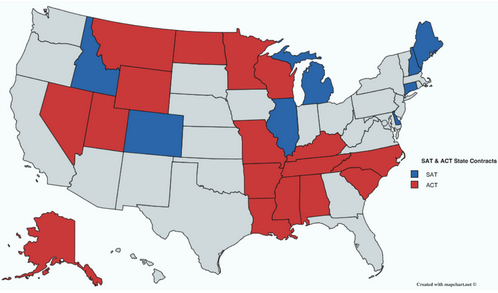
Source: https://www.applerouth.com/blog/2016/01/13/how-the-sat-got-its-groove-back/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Key Takeaways**

The SAT and ACT exams is widely accepted as a requirement for college application and usually colleges specify either one and not both. Hence, due to this, states and high schools would typically recommend either one or the other as the assessment criteria. Furthermore, should one state enter into a statewide contract with either the SAT or ACT exam, we typically see the participation rates increased to 100% for the favored exam while participation rates will significantly declined for the other exam. 

<br>
Additionally, if the state decides to enter into a statewide contract, it would usually enter into multi-year contract, resulting in an entrenched status for that particular exam in the next few years, generating externalities and economies of scale for that particular exam's and related products. 


    
After losing relevance in the early 2000s until 2014, the SAT revamped and started regaining its popularity as the most important assessment for college applications in 2016 by aggressively pursuing exclusive statewide contracts, better marketing and organizing of SAT School Days. Despite being back as the leader, the SAT should not relax its pace and should instead sought to extend its lead against the ACT. 

**Identifying Arizona - The Next Battleground**

In our filtering of a US State to focus on, we return to our df_part dataframe which contains the ACT & SAT participation rates for 2017 and 2018. We then apply the below filter:
1. SAT 2018 participation rates < 30%: This returns the states that are not predominantly using the SAT which will provide significant upside should we decide to focus our efforts on. 

2. ACT 2018 participation rates < 90%: This returns the states that the ACT do not have a monopoly currently. While it is possible to focus on states that currently have an exclusive ACT statewide contract that is ending, we believe that flipping the state will require financial outlays that might not be economical at the end of the day. Hence, targeting a state that currently do not lean towards either exams could potentially provide immediate returns. 


 
</font>     


In [151]:
df_part.loc[(df_part['sat_2018_part'] < 30) & (df_part['act_2018_part'] < 90)]

state  sat_2017_part  sat_2018_part  act_2017_part  act_2018_part  \
2         Arizona           30.0           29.0           62.0           66.0   
15           Iowa            2.0            3.0           67.0           68.0   
16         Kansas            4.0            4.0           73.0           71.0   
31     New Mexico           11.0           16.0           66.0           67.0   
41   South Dakota            3.0            3.0           80.0           77.0   
48  West Virginia           14.0           28.0           69.0           65.0   

    sat_part_change  act_part_change  
2               1.0              4.0  
15              1.0              1.0  
16              0.0              2.0  
31              5.0              1.0  
41              0.0              3.0  
48             14.0              4.0

In [152]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

**State of Arizona, est. Jul 2019**


|Type|Figues|
|:-|:-:|
|Population|7,278,717|
|Persons under 18 |22.5%|
|Black or African Amercian alone|5.2%|
|American Indian and Alaska Native alone|5.3%|
|Asian alone|3.7%|
|Native Hawaiian and Other Pacific Islander alone|0.3%|
|Hispanic or Latino|31.7%|
|White alone, not Hispanic or Latino|54.1%|

<br>
(extracted from US Census Bureau: https://www.census.gov/quickfacts/AZ)

From our filters, 6 states were returned. Out of these 6 states, we would like to select a state that has the biggest market. As we do not have population data in our dataframe, a quick search in the internet reveals that Arizona has the biggest population at 7.3 million. Additionally, about 1.6 million person are below the age of 18, whom have yet to finish their high school and are our immediate addressable market. Unfortunately, US Census Bureau did not provide further breakdowns on the number of people below age 18.
    
**Entry Strategies**

To enter Arizona and firmly entrenched SAT as the assessment of choice for high school graduates, finer details and data points are needed. As neither the SAT or ACT is compulsory, high school graduates are likely to choose either the SAT or ACT based on:
1. Personal motivation
2. Recommendations from friends, mentors, or schools
3. Colleges recommendations, etc
  
Detailed interviews / surveys / focus groups can be conducted on both SAT and ACT test takers to gather information on why they made that particular choice. Data collected from ACT test takers will be of particular interest as it might reveal insights on why they chose it instead of the SAT. 
    
The same approach can be used on high schools and educators in Arizona. Schools are likely not to prepare students for both exams and hence will likely focus on either the ACT or the SAT. Information should be collected on why they might prefer to teach or recommend students to take a particular exam. 
    
At the same time, parents could likely be a source of influence and factor in deciding which test to evetually take as well. Lastly, even if the state is not keen on an exclusive statewide contract, the state itself could be approached to gather information on the factors they consider for statewide collaboration. 
    
The aim of all these approaches is to remove any potential barriers while creating ease of access and motivation for students to attempt the SAT.
    
**Entrenchment Strategies**
    
Once entry is gained in Arizona, the next step is to be entrenched in Arizona to become the exam of choice for high school graduates in the state. College Board suite of programs and activities can be utilized, including SAT School Days, access to the Advance Placement Program as well as scholarships. 
    
Access and support for minority or disadvantaged groups should be avocated. Arizona has a substantial proportion of minority groups where almost 15% are Blacks / African Americans, American Indians / Alaska Natives / Asians or Native Hawaiians. This aligns closely to College Board's mission of connecting students to college success and opportunity. Success stories should be actively trumpeted. 
    
**Replicating Success**

With Arizona converted and won, similar strategies can be employed in other states that do not have an exclusive statewide contract (ie, the other 5 states that we identified in our initial list). Should we be successful, there is no doubt that College Board and SAT will become a unique brand in the minds of high school graduates, parents, colleges and educators. Once achieved, market and brand dominance over the ACT will be inevitable. 

### Sources

College Board:
    
https://about.collegeboard.org/overview
    
Background context of SAT & ACT and discussion of statewide contracts:
<br>     
https://www.nytimes.com/2014/03/06/education/major-changes-in-sat-announced-by-college-board.html
    
    
https://www.applerouth.com/blog/2016/01/13/how-the-sat-got-its-groove-back/

https://www.newamerica.org/education-policy/edcentral/how-college-boards-aggressive-campaign-to-save-the-sat-may-kill-it/

https://www.washingtonpost.com/news/grade-point/wp/2015/12/24/the-sat-now-the-no-2-college-test-pushes-to-reclaim-supremacy/

https://blog.collegevine.com/sat-vs-act-everything-you-need-to-know/

Investigative report on the SAT scandal:

https://www.forbes.com/sites/susanadams/2020/09/30/the-forbes-investigation-how-the-sat-failed-america/?sh=71a076b553b5


SAT School Day and related research:

https://reports.collegeboard.org/archive/sat-suite-program-results/2018/sat-school-day

Alaska's particiation rates:

https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/

https://www.govtech.com/education/k-12/Alaska-Education-Department-Looks-for-New-Test-After-Online-Exam-Struggles.html

https://chariotlearning.com/which-states-use-the-sat-or-act-for-state-testing/

Arizonia data & information:
    
https://www.infoplease.com/us/states/state-population-by-rank

https://www.census.gov/quickfacts/AZ

https://azsbe.az.gov/assessments-and-menu-assessments

### Addendum

During our project brief, we were given data for SAT 2017 & 2018 and ACT 2017 & 2018 and were told to spot for errors in the data for 2017 but take the data for 2018 as-is. While doing outside research and recommendations we notice 2 errors in the 2018 data:
<br>
    
1. SAT Particiation rates for Florida should be higher and closer to 90+% in 2018 instead of 56%
2. SAT section and total scores for UTAH in 2018 should have been higher

Hence, in most of our conclusion or observations, we knowingly choose to ignore writing about these 2 states. That said, we believe that our overall analysis and conclusions suffer no loss of generality even with the mentioned errors. 
